In [1]:
from amdmap import amdmap

/home/namatrud/projects/ucie-analysis/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://amdsso.okta.com/app/snowflake/exk74wl5eimjWYeLJ697/sso/saml?SAMLRequest=nZJPc9owEMW%2Fikc927IdB4IGyJgwNFCSMkDCtDfVXoiKLDlaGZN8%2Bsr86dBDcuhNI73d39O%2B7d7uC%2BntwKDQqkeiICQeqEznQm165Gk58m%2BIh5arnEutoEfeAMltv4u8kCVLK%2Fui5vBaAVrPNVLImoceqYximqNApngByGzGFunDlMVByDgiGOtw5FSSo3CsF2tLRmld10F9FWizoXEYhjTsUKdqJF%2FIBaL8nFEabXWm5blk7%2F70ASKiYdIgnMIRZqfCgVDHEXxG%2BXUUIbtfLmf%2B7PtiSbz0%2FLs7rbAqwCzA7EQGT%2FPp0QA6B7zIwygAjtav0I8D%2Fl4ZCFDpei35FjJdlJV1nQN3omvIqdQb4eY1HvZIuRX5qrO6niaDusY0rkbPizX%2FdjOYA052vF1MysXD%2B9dU3m%2BywWuSEe%2F5nG7cpDtGrGCsmkytuwrjxA%2Bv%2FLi1jNosbrGkFdzEnZ%2FEG7pMheL2UHlhHFEHemv5wRsvS%2FrXNoX9tp3U8hpE8Xv1A6aTVqdNnZ42iZHj0rAD3%2FT%2FZxRdetnhtIOPLpbxcKalyN68kTYFtx%2BnFgXR4Ubk%2FvogZVBwIdM8N4Do0pNS13cGuHWrbk0FhPaP1H%2BXvf8

ERROR: Registry editing has been disabled by your administrator.
Parameter format not correct - ""


In [2]:
with amdmap.query('BGF3_ucie_checkout') as q:
    with q.event() as e:
        e.start_date = '-14d'
        e.lot_id = 'E9N641%'
        e.test_program_name = 'BGF3WFRXX0A0AWP0'
        with e.test_event() as te:
            te.test_name = 'UCIE%'
            te.columns = 'base_class, sub_class, test_name, flow_context, is_binnable, test_result'
            te.tuple_columns = 'celltype, clk0, clk1, descp, dft_struct0, fo, freq0, freq0_rel, freq1, index, length, mode, pattern, phy_type, pin_name, power_rel, shiftfreq0, speed, str, stress, supply0, supply1, sweep_value, test_type, vdd0, vdd1, vt'

In [3]:
query = amdmap.queries('BGF3_ucie_checkout')

In [4]:
query.submit()

Submitted Snowflake job 'BGF3_ucie_checkout' synchronously using REST with the default warehouse, waiting for completion...
Job 9672806d-547a-4a65-af91-4d14f0adc6ff completed successfully, completed in 0:01:36, with 194558 rows 103 columns
Job 9672806d-547a-4a65-af91-4d14f0adc6ff is remote, dataset can be found at DASH_EXTRACT_PROD.USER_DATA.TEST_SQL_QUERY_9672806D_547A_4A65_AF91_4D14F0ADC6FF


True

In [5]:
query.retrieve()
df = query.df

Retrieving remote dataset from DASH_EXTRACT_PROD.USER_DATA.TEST_SQL_QUERY_9672806D_547A_4A65_AF91_4D14F0ADC6FF...
Remote dataset returned a dataframe with 194558 rows and 103 columns
The dataframe can be accessed as so: amdmap.queries('BGF3_ucie_checkout').df


In [6]:
# Parse Parameters from Flow Context
df[['LinkWidth', 'Testcase', 'Segment', 'Test']] = df['FLOW_CONTEXT'].str.split('_', expand=True)[[2,4,5,6]]

In [48]:
df[['SERIAL_NUMBER', 'MFG_AREA_NAME', 'MFG_STEP_NAME', 'TEST_PROGRAM_NAME', 'TEST_PROGRAM_VERSION', 'LOT_ID', 'WAFER_NUM', 'X_COORD', 'Y_COORD', 'TEST_NAME', 'FLOW_CONTEXT','BASE_CLASS','SUB_CLASS', 'PHY_TYPE','POWER_REL', 'PIN_NAME',
        'TEST_TYPE', 'VDD1', 'VDD0', 'MODE', 'SPEED', 'INDEX', 'PATTERN', 'LinkWidth', 'Testcase', 'Segment', 'Test', 'TEST_RESULT', 'PRODUCT_SUB_FAMILY' ]]

,SERIAL_NUMBER,MFG_AREA_NAME,MFG_STEP_NAME,TEST_PROGRAM_NAME,TEST_PROGRAM_VERSION,LOT_ID,WAFER_NUM,X_COORD,Y_COORD,TEST_NAME,...,MODE,SPEED,INDEX,PATTERN,LinkWidth,Testcase,Segment,Test,TEST_RESULT,PRODUCT_SUB_FAMILY
0,E9N6410014040101,TSMC,WS2,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,4,1,None,...,None,None,None,None,None,None,None,None,NaN,None
1,E9N6410014050101,TSMC,WS2,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,5,1,None,...,None,None,None,None,None,None,None,None,NaN,None
2,E9N6410014050201,TSMC,WS1,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,5,2,UCIE.CHECK;VDD0=0.9000000;VDD1=1.0000000;TEST_...,...,LOOPBACK,16000,PHY1,BGF3_PHY_TRN_LPBK_PHY1_X64_TC11_SEG3_PRETRAIN_KGD,X64,TC11,SEG3,EMAP,0.0,TESTCHIP
3,E9N6410014001101,TSMC,WS2,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,0,11,UCIE.CHECK;VDD0=0.9000000;VDD1=1.0000000;TEST_...,...,LOOPBACK,16000,PHY0,BGF3_PHY_TRN_LPBK_PHY0_X32_TC4_SEG1_BOOTUP_CHE...,X32,TC4,SEG1,BOOTUP,1.0,None
4,E9N6410014001201,TSMC,WS1,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,0,12,UCIE.CHECK;VDD0=0.9000000;VDD1=1.0000000;TEST_...,...,LOOPBACK,16000,PHY1,BGF3_PHY_TRN_LPBK_PHY1_X64_TC11_SEG3_PRETRAIN_KGD,X64,TC11,SEG3,EMAP,0.0,TESTCHIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194553,E9N6410014061801,TSMC,WS1,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,6,18,UCIE.CHECK;VDD0=0.9000000;VDD1=1.0000000;TEST_...,...,LOOPBACK,32000,PHY3,BGF3_PHY_TRN_LPBK_PHY3_X32_TC8_SEG0_PRETRAIN_KGD,X32,TC8,SEG0,EMAP,0.0,TESTCHIP
194554,E9N6410014031701,TSMC,WS2,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,3,17,UCIE.CHECK;VDD0=0.9000000;VDD1=1.0000000;TEST_...,...,LOOPBACK,32000,PHY3,BGF3_PHY_TRN_LPBK_PHY3_X32_TC8_SEG0_PRETRAIN_KGD,X32,TC8,SEG0,EMAP,0.0,None
194555,E9N6410014062301,TSMC,WS2,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,6,23,UCIE.CHECK;VDD0=0.9000000;VDD1=1.0000000;TEST_...,...,LOOPBACK,32000,PHY0,BGF3_PHY_TRN_LPBK_PHY0_X32_TC13_SEG3_PRETRAIN_KGD,X32,TC13,SEG3,EMAP,0.0,None
194556,E9N6410014072001,TSMC,WS1,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,7,20,UCIE.CHECK;VDD0=0.9000000;VDD1=1.0000000;TEST_...,...,LOOPBACK,32000,PHY0,BGF3_PHY_TRN_LPBK_PHY0_X32_TC13_SEG3_PRETRAIN_KGD,X32,TC13,SEG3,EMAP,0.0,TESTCHIP


In [8]:
tc_pass_bootup = df[df.Test=='BOOTUP'].groupby(['SERIAL_NUMBER', 'MFG_AREA_NAME', 'MFG_STEP_NAME', 'TEST_PROGRAM_NAME', 'TEST_PROGRAM_VERSION', 'LOT_ID', 'WAFER_NUM', 'X_COORD', 'Y_COORD', 'MODE', 'SPEED', 'INDEX', 'LinkWidth', 'Test', 'Testcase']).agg({'TEST_RESULT':'sum', 'Segment':'nunique'}).assign(PASSING_SEGMENT_PERCENT=lambda x: x['TEST_RESULT'] / x['Segment'] ).reset_index()

In [9]:
tc_pass_pretrain = df[df.Test=='PRETRAIN'].groupby(['SERIAL_NUMBER', 'MFG_AREA_NAME', 'MFG_STEP_NAME', 'TEST_PROGRAM_NAME', 'TEST_PROGRAM_VERSION', 'LOT_ID', 'WAFER_NUM', 'X_COORD', 'Y_COORD', 'MODE', 'SPEED', 'INDEX', 'LinkWidth', 'Test', 'Testcase']).agg({'TEST_RESULT':'sum', 'Segment':'nunique'}).assign(PASSING_SEGMENT_PERCENT=lambda x: x['TEST_RESULT'] / x['Segment'] ).reset_index()

In [10]:
tc_pass_bootup

,SERIAL_NUMBER,MFG_AREA_NAME,MFG_STEP_NAME,TEST_PROGRAM_NAME,TEST_PROGRAM_VERSION,LOT_ID,WAFER_NUM,X_COORD,Y_COORD,MODE,SPEED,INDEX,LinkWidth,Test,Testcase,TEST_RESULT,Segment,PASSING_SEGMENT_PERCENT
0,E9N6410014001101,TSMC,WS2,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,0,11,LOOPBACK,16000,PHY0,X32,BOOTUP,TC10,1.0,4,0.25
1,E9N6410014001101,TSMC,WS2,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,0,11,LOOPBACK,16000,PHY0,X32,BOOTUP,TC11,0.0,4,0.00
2,E9N6410014001101,TSMC,WS2,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,0,11,LOOPBACK,16000,PHY0,X32,BOOTUP,TC12,0.0,4,0.00
3,E9N6410014001101,TSMC,WS2,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,0,11,LOOPBACK,16000,PHY0,X32,BOOTUP,TC15,2.0,4,0.50
4,E9N6410014001101,TSMC,WS2,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,0,11,LOOPBACK,16000,PHY0,X32,BOOTUP,TC3,4.0,4,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11387,E9N6410014091501,TSMC,WS2,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,9,15,LOOPBACK,4000,PHY2,X64,BOOTUP,TC2,9.0,9,1.00
11388,E9N6410014091501,TSMC,WS2,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,9,15,LOOPBACK,4000,PHY2,X64,BOOTUP,TC9,9.0,9,1.00
11389,E9N6410014091501,TSMC,WS2,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,9,15,LOOPBACK,4000,PHY3,X32,BOOTUP,TC1,4.0,4,1.00
11390,E9N6410014091501,TSMC,WS2,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,9,15,LOOPBACK,4000,PHY3,X32,BOOTUP,TC2,4.0,4,1.00


In [11]:
tc_pass_pretrain

,SERIAL_NUMBER,MFG_AREA_NAME,MFG_STEP_NAME,TEST_PROGRAM_NAME,TEST_PROGRAM_VERSION,LOT_ID,WAFER_NUM,X_COORD,Y_COORD,MODE,SPEED,INDEX,LinkWidth,Test,Testcase,TEST_RESULT,Segment,PASSING_SEGMENT_PERCENT
0,E9N6410014001101,TSMC,WS2,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,0,11,LOOPBACK,16000,PHY0,X32,PRETRAIN,TC10,0.0,4,0.000000
1,E9N6410014001101,TSMC,WS2,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,0,11,LOOPBACK,16000,PHY0,X32,PRETRAIN,TC11,0.0,4,0.000000
2,E9N6410014001101,TSMC,WS2,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,0,11,LOOPBACK,16000,PHY0,X32,PRETRAIN,TC12,0.0,4,0.000000
3,E9N6410014001101,TSMC,WS2,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,0,11,LOOPBACK,16000,PHY0,X32,PRETRAIN,TC15,0.0,4,0.000000
4,E9N6410014001101,TSMC,WS2,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,0,11,LOOPBACK,16000,PHY0,X32,PRETRAIN,TC3,4.0,4,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11387,E9N6410014091501,TSMC,WS2,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,9,15,LOOPBACK,4000,PHY2,X64,PRETRAIN,TC2,8.0,9,0.888889
11388,E9N6410014091501,TSMC,WS2,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,9,15,LOOPBACK,4000,PHY2,X64,PRETRAIN,TC9,9.0,9,1.000000
11389,E9N6410014091501,TSMC,WS2,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,9,15,LOOPBACK,4000,PHY3,X32,PRETRAIN,TC1,4.0,4,1.000000
11390,E9N6410014091501,TSMC,WS2,BGF3WFRXX0A0AWP0,1.8.7,E9N641.00,14,9,15,LOOPBACK,4000,PHY3,X32,PRETRAIN,TC2,2.0,4,0.500000


/tmp/ipykernel_35753/2992378718.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tc_pass_segments = df[df.LinkWidth == 'X64'][df.Test == 'PRETRAIN'].groupby(['MODE', 'SPEED', 'INDEX', 'LinkWidth', 'Test', 'Testcase', 'Segment']).agg({'TEST_RESULT':'sum', 'SERIAL_NUMBER':'nunique'}).assign(PASSING_DIE_PERCENT=lambda x: x['TEST_RESULT'] / x['SERIAL_NUMBER'] ).reset_index()


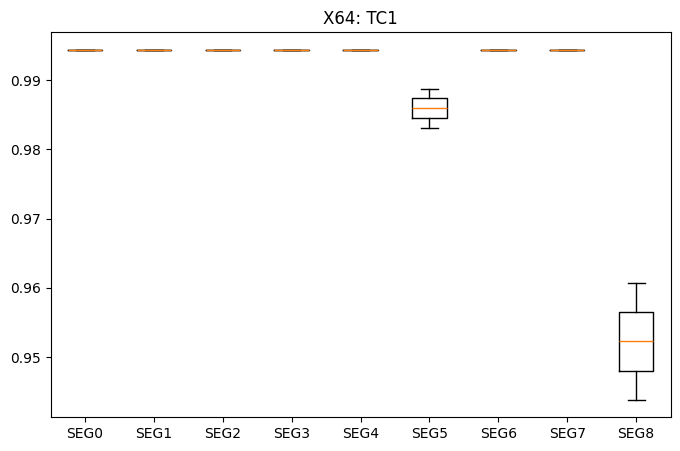

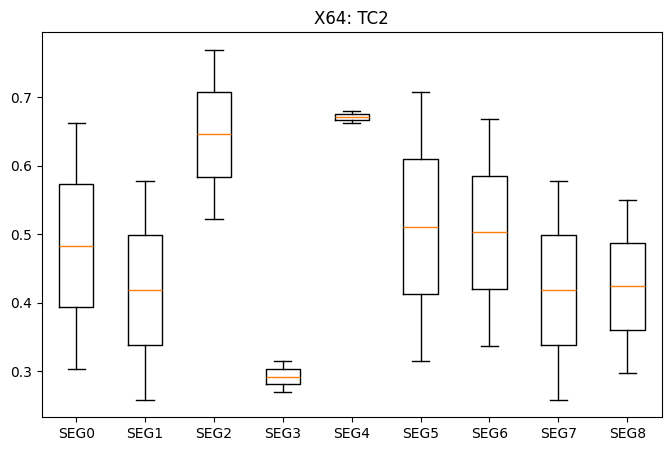

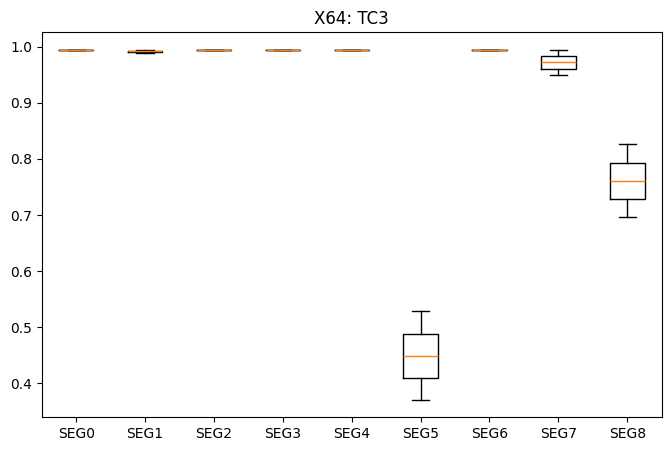

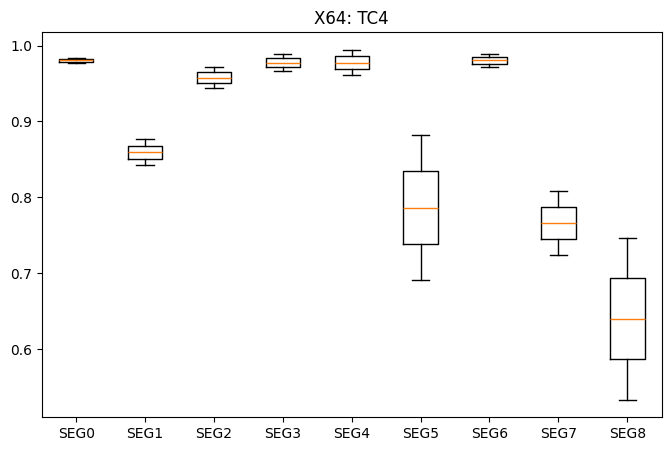

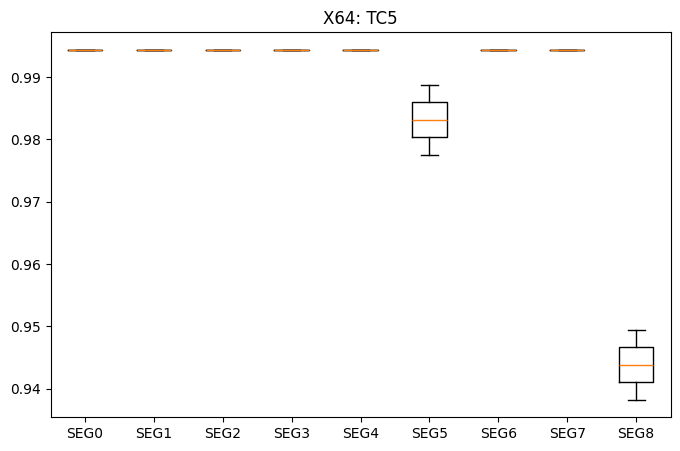

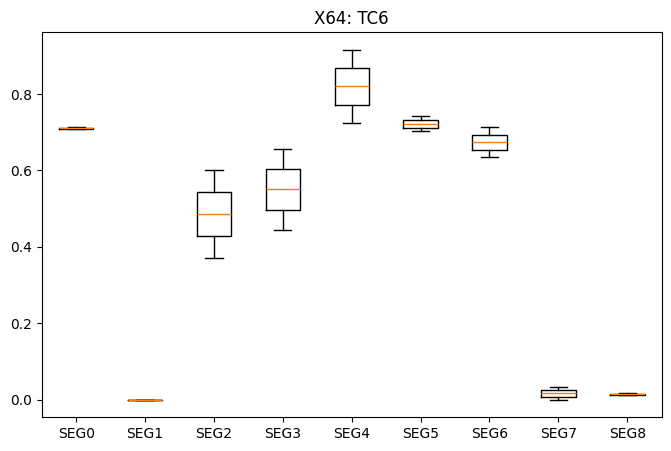

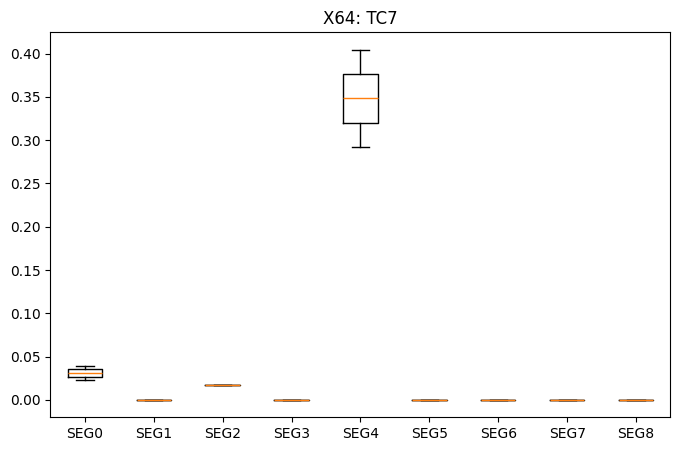

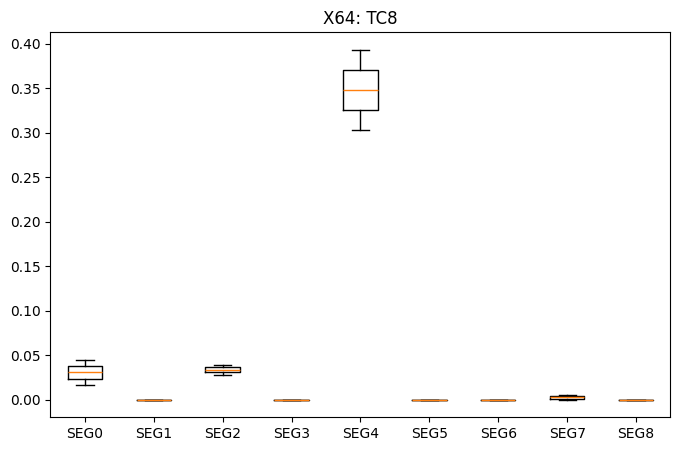

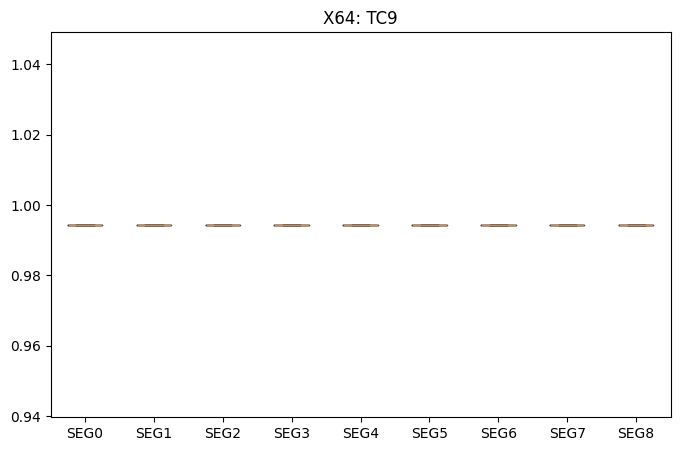

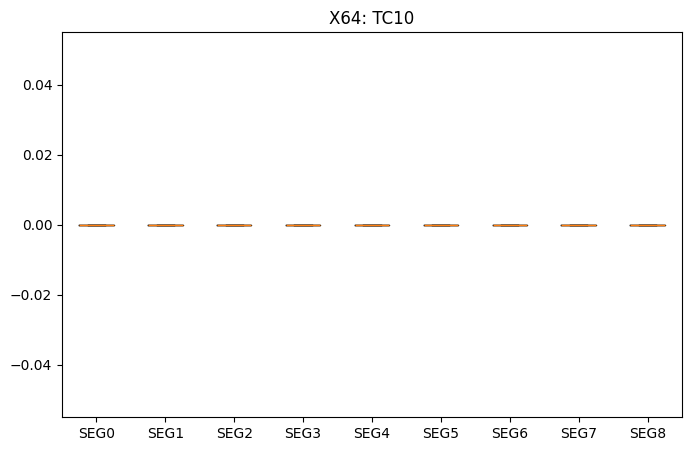

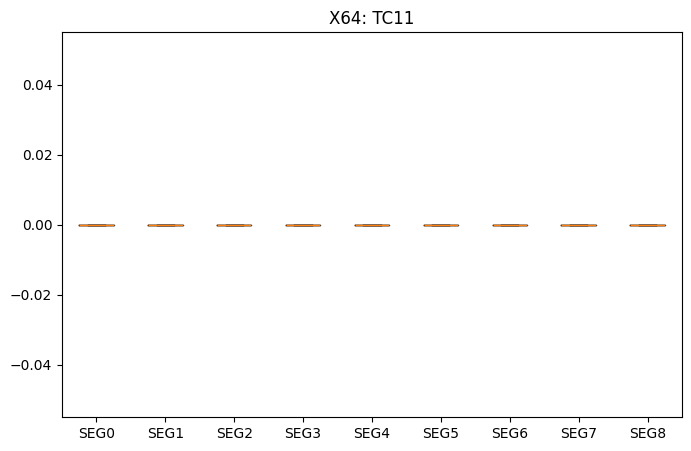

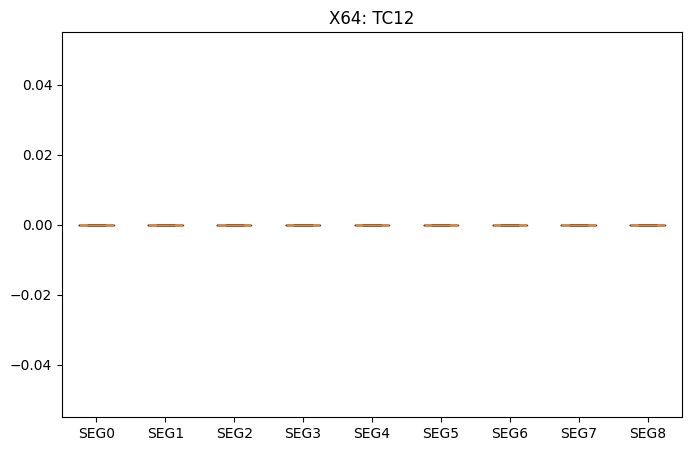

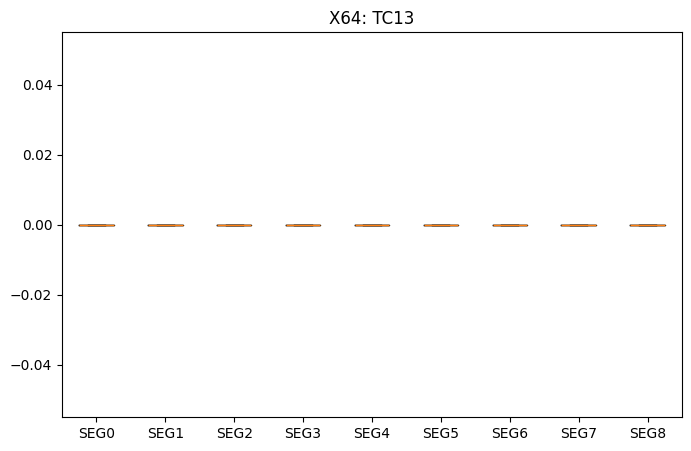

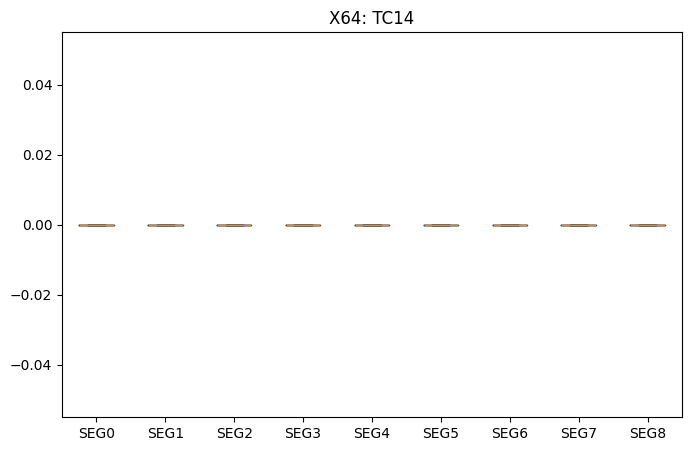

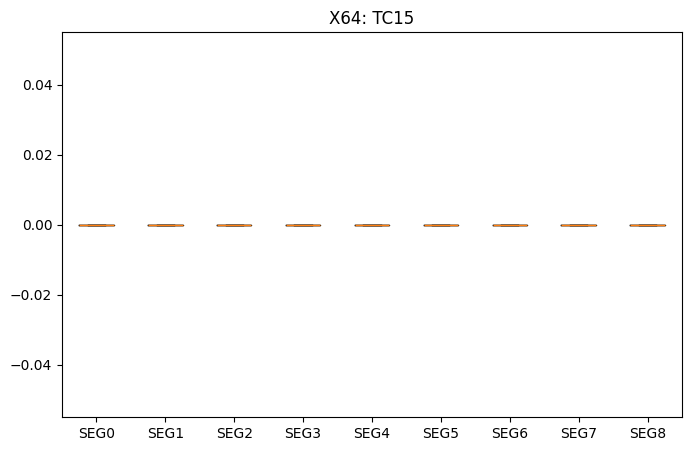

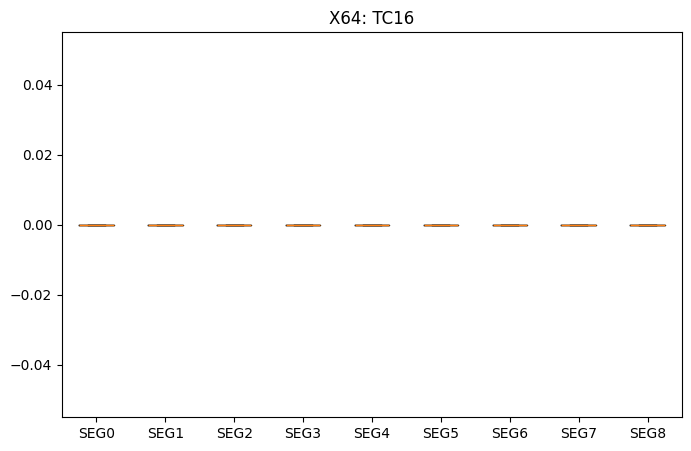

In [54]:
tc_pass_segments = df[df.LinkWidth == 'X64'][df.Test == 'PRETRAIN'].groupby(['MODE', 'SPEED', 'INDEX', 'LinkWidth', 'Test', 'Testcase', 'Segment']).agg({'TEST_RESULT':'sum', 'SERIAL_NUMBER':'nunique'}).assign(PASSING_DIE_PERCENT=lambda x: x['TEST_RESULT'] / x['SERIAL_NUMBER'] ).reset_index()
testcases = natsorted(list(tc_pass_segments.Testcase.unique()))
segments = natsorted(list(tc_pass_segments.Segment.unique()))
tc_pass_segments_pivot = tc_pass_segments.pivot_table(index=['MODE', 'SPEED', 'INDEX', 'LinkWidth', 'Test', 'Testcase' ], columns='Segment', values='PASSING_DIE_PERCENT').reset_index()
# tc_pass_segments_pivot.fillna(0, inplace=True)

for t in testcases:
    plt.figure(figsize=(8,5))
    plt.title(f"X64: {t}")
    plt.boxplot(tc_pass_segments_pivot[tc_pass_segments_pivot.Testcase == t][segments], labels=segments)

# tc_pass_segments_pivot, testcases, segments

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from natsort import natsorted
%matplotlib inline

In [13]:
tc_pass_bootup_pivot = tc_pass_bootup.pivot_table(index=['SERIAL_NUMBER', 'MFG_STEP_NAME', 'TEST_PROGRAM_VERSION', 'LOT_ID', 'WAFER_NUM', 'X_COORD', 'Y_COORD','Test', 'INDEX'], columns='Testcase', values='PASSING_SEGMENT_PERCENT').reset_index()
tc_pass_bootup_pivot['Y'] = tc_pass_bootup_pivot.apply(lambda row : ( row.X_COORD+0.375 if row.INDEX=='PHY1' else row.X_COORD+0.625 if row.INDEX=='PHY2' else row.X_COORD+0.875 if row.INDEX=='PHY3' else row.X_COORD+0.125 ), axis=1)
tc_pass_bootup_pivot['X'] = tc_pass_bootup_pivot.apply(lambda row : ( row.Y_COORD+0.5 ), axis=1)
tc_pass_bootup_pivot

Testcase,SERIAL_NUMBER,MFG_STEP_NAME,TEST_PROGRAM_VERSION,LOT_ID,WAFER_NUM,X_COORD,Y_COORD,Test,INDEX,TC1,...,TC2,TC3,TC4,TC5,TC6,TC7,TC8,TC9,Y,X
0,E9N6410014001101,WS2,1.8.7,E9N641.00,14,0,11,BOOTUP,PHY0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.500000,0.500000,1.0,0.125,11.5
1,E9N6410014001101,WS2,1.8.7,E9N641.00,14,0,11,BOOTUP,PHY1,1.0,...,1.0,1.0,1.0,1.0,1.0,0.555556,0.555556,1.0,0.375,11.5
2,E9N6410014001101,WS2,1.8.7,E9N641.00,14,0,11,BOOTUP,PHY2,1.0,...,1.0,1.0,1.0,1.0,1.0,0.555556,0.555556,1.0,0.625,11.5
3,E9N6410014001101,WS2,1.8.7,E9N641.00,14,0,11,BOOTUP,PHY3,1.0,...,1.0,1.0,1.0,1.0,1.0,0.500000,0.750000,1.0,0.875,11.5
4,E9N6410014001201,WS1,1.8.7,E9N641.00,14,0,12,BOOTUP,PHY0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.750000,0.500000,1.0,0.125,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,E9N6410014091401,WS1,1.8.7,E9N641.00,14,9,14,BOOTUP,PHY3,1.0,...,1.0,1.0,1.0,1.0,1.0,0.250000,0.250000,1.0,9.875,14.5
708,E9N6410014091501,WS2,1.8.7,E9N641.00,14,9,15,BOOTUP,PHY0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.750000,0.750000,1.0,9.125,15.5
709,E9N6410014091501,WS2,1.8.7,E9N641.00,14,9,15,BOOTUP,PHY1,1.0,...,1.0,1.0,1.0,1.0,1.0,0.444444,0.444444,1.0,9.375,15.5
710,E9N6410014091501,WS2,1.8.7,E9N641.00,14,9,15,BOOTUP,PHY2,1.0,...,1.0,1.0,1.0,1.0,1.0,0.555556,0.555556,1.0,9.625,15.5


In [14]:
tc_pass_pretrain_pivot = tc_pass_pretrain.pivot_table(index=['SERIAL_NUMBER', 'MFG_STEP_NAME', 'TEST_PROGRAM_VERSION', 'LOT_ID', 'WAFER_NUM', 'X_COORD', 'Y_COORD', 'Test', 'INDEX' ], columns='Testcase', values='PASSING_SEGMENT_PERCENT').reset_index()
tc_pass_pretrain_pivot['Y'] = tc_pass_pretrain_pivot.apply(lambda row : ( row.X_COORD+0.375 if row.INDEX=='PHY1' else row.X_COORD+0.625 if row.INDEX=='PHY2' else row.X_COORD+0.875 if row.INDEX=='PHY3' else row.X_COORD+0.125 ), axis=1)
tc_pass_pretrain_pivot['X'] = tc_pass_pretrain_pivot.apply(lambda row : ( row.Y_COORD+0.5 ), axis=1)
tc_pass_pretrain_pivot

Testcase,SERIAL_NUMBER,MFG_STEP_NAME,TEST_PROGRAM_VERSION,LOT_ID,WAFER_NUM,X_COORD,Y_COORD,Test,INDEX,TC1,...,TC2,TC3,TC4,TC5,TC6,TC7,TC8,TC9,Y,X
0,E9N6410014001101,WS2,1.8.7,E9N641.00,14,0,11,PRETRAIN,PHY0,1.0,...,1.000000,1.000000,0.750000,1.000000,0.500000,0.0,0.000000,1.0,0.125,11.5
1,E9N6410014001101,WS2,1.8.7,E9N641.00,14,0,11,PRETRAIN,PHY1,1.0,...,0.333333,0.888889,1.000000,1.000000,0.111111,0.0,0.000000,1.0,0.375,11.5
2,E9N6410014001101,WS2,1.8.7,E9N641.00,14,0,11,PRETRAIN,PHY2,1.0,...,0.555556,0.888889,1.000000,1.000000,0.333333,0.0,0.000000,1.0,0.625,11.5
3,E9N6410014001101,WS2,1.8.7,E9N641.00,14,0,11,PRETRAIN,PHY3,1.0,...,1.000000,1.000000,1.000000,1.000000,0.750000,0.0,0.000000,1.0,0.875,11.5
4,E9N6410014001201,WS1,1.8.7,E9N641.00,14,0,12,PRETRAIN,PHY0,1.0,...,1.000000,0.750000,1.000000,1.000000,0.000000,0.0,0.000000,1.0,0.125,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,E9N6410014091401,WS1,1.8.7,E9N641.00,14,9,14,PRETRAIN,PHY3,1.0,...,0.750000,1.000000,1.000000,1.000000,0.250000,0.0,0.000000,1.0,9.875,14.5
708,E9N6410014091501,WS2,1.8.7,E9N641.00,14,9,15,PRETRAIN,PHY0,1.0,...,0.750000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,1.0,9.125,15.5
709,E9N6410014091501,WS2,1.8.7,E9N641.00,14,9,15,PRETRAIN,PHY1,1.0,...,0.666667,0.888889,0.777778,0.888889,0.555556,0.0,0.000000,1.0,9.375,15.5
710,E9N6410014091501,WS2,1.8.7,E9N641.00,14,9,15,PRETRAIN,PHY2,1.0,...,0.888889,0.888889,0.888889,0.888889,0.222222,0.0,0.111111,1.0,9.625,15.5


In [15]:
testcases = natsorted(tc_pass_bootup_pivot.filter(regex="TC.*").columns.to_list())

[]

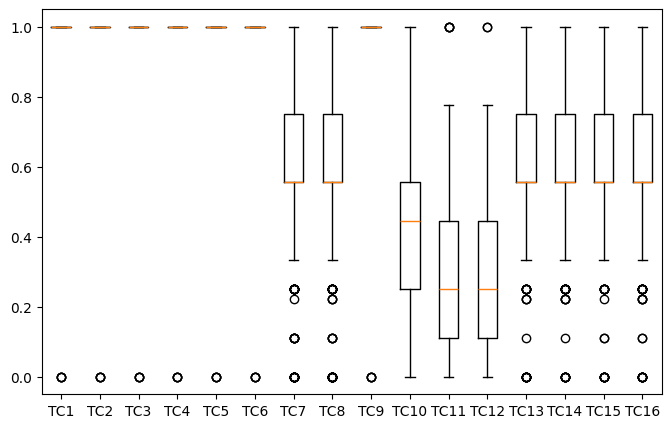

In [16]:
plt.figure(figsize=(8,5))
plt.boxplot(tc_pass_bootup_pivot[testcases], labels=testcases)
[]

[]

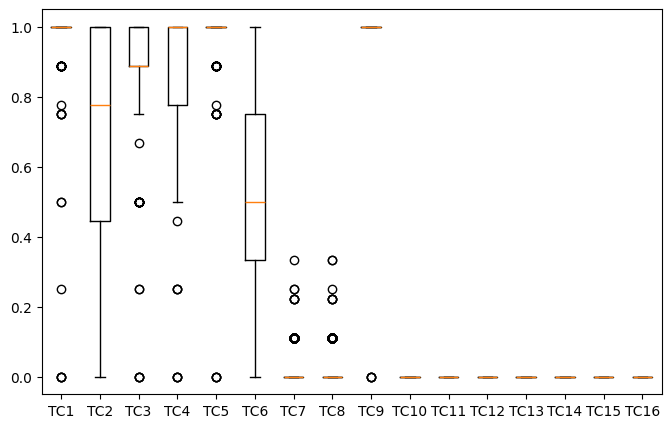

In [17]:
plt.figure(figsize=(8,5))
plt.boxplot(tc_pass_pretrain_pivot[testcases], labels=testcases)
[]

In [18]:
def plot_wafer(df, cols, title):
    for col in cols:
        plt.figure(figsize=(12,12))
        plt.title(f"{title} - {col}")
        plt.xlabel('Y_COORD')
        plt.gca().invert_yaxis()
        plt.ylabel('X_COORD')
        plt.xticks(np.arange(0, 27 + 1, 1.0))
        plt.yticks(np.arange(0, 10 + 1, 1.0))
        plt.rc('grid', linestyle="-", color='gray')
        plt.grid(True)
        plt.gca().set_axisbelow(True)
        plt.scatter(df.X, df.Y, c=df[col], marker='s', s=100, cmap='brg', vmin=0, vmax=1)
        plt.colorbar().set_label('Percent of Passing Segments')

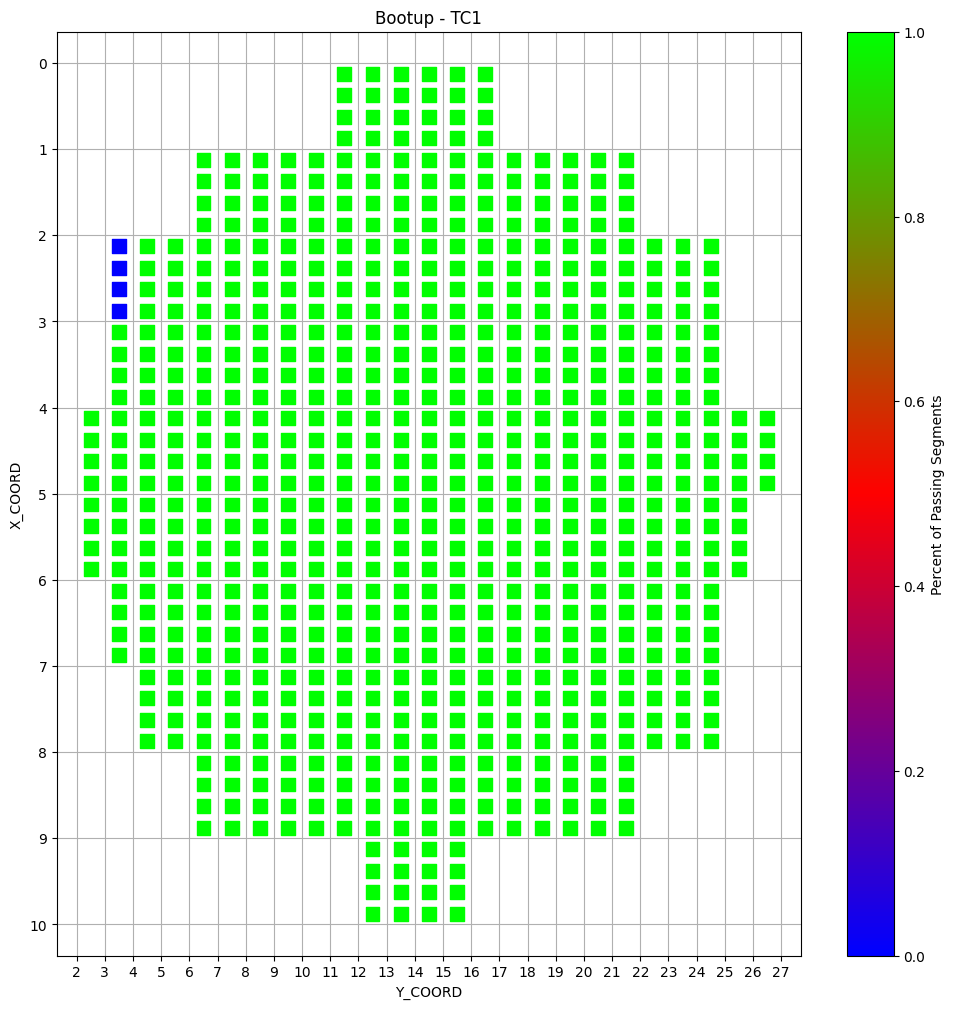

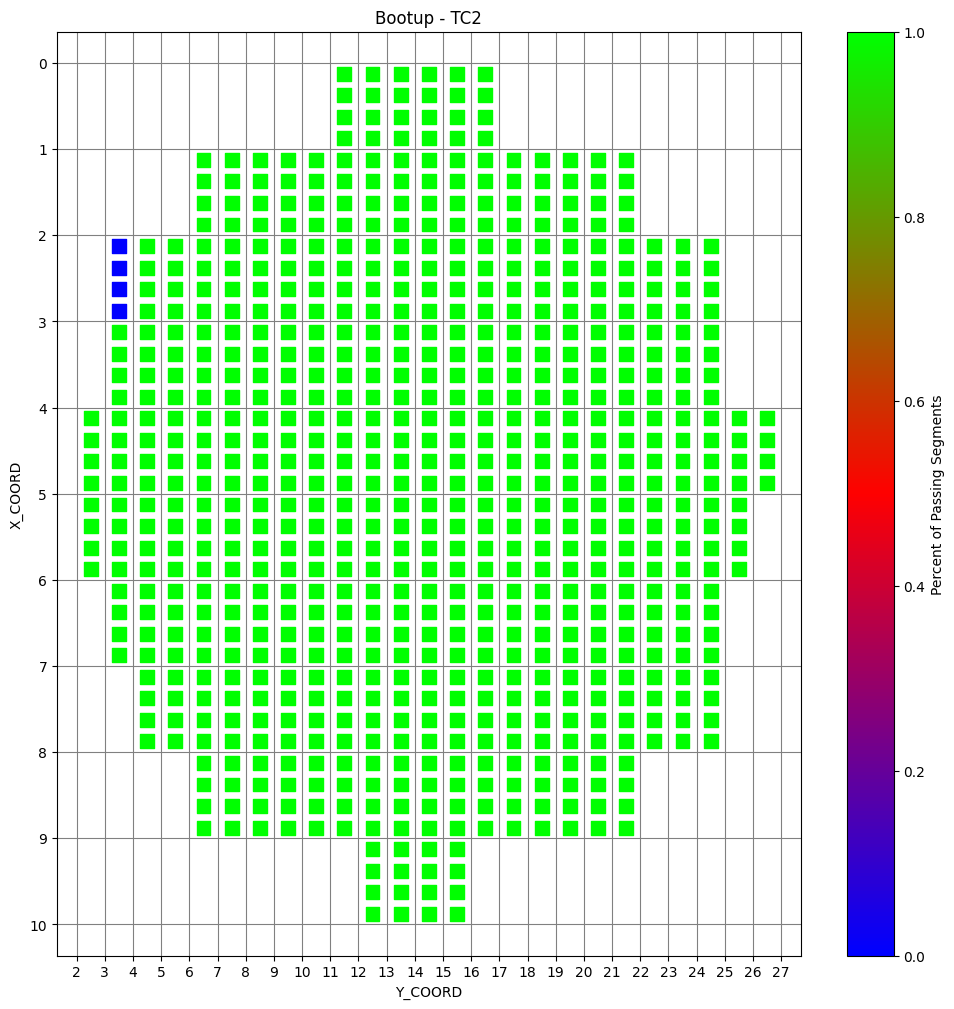

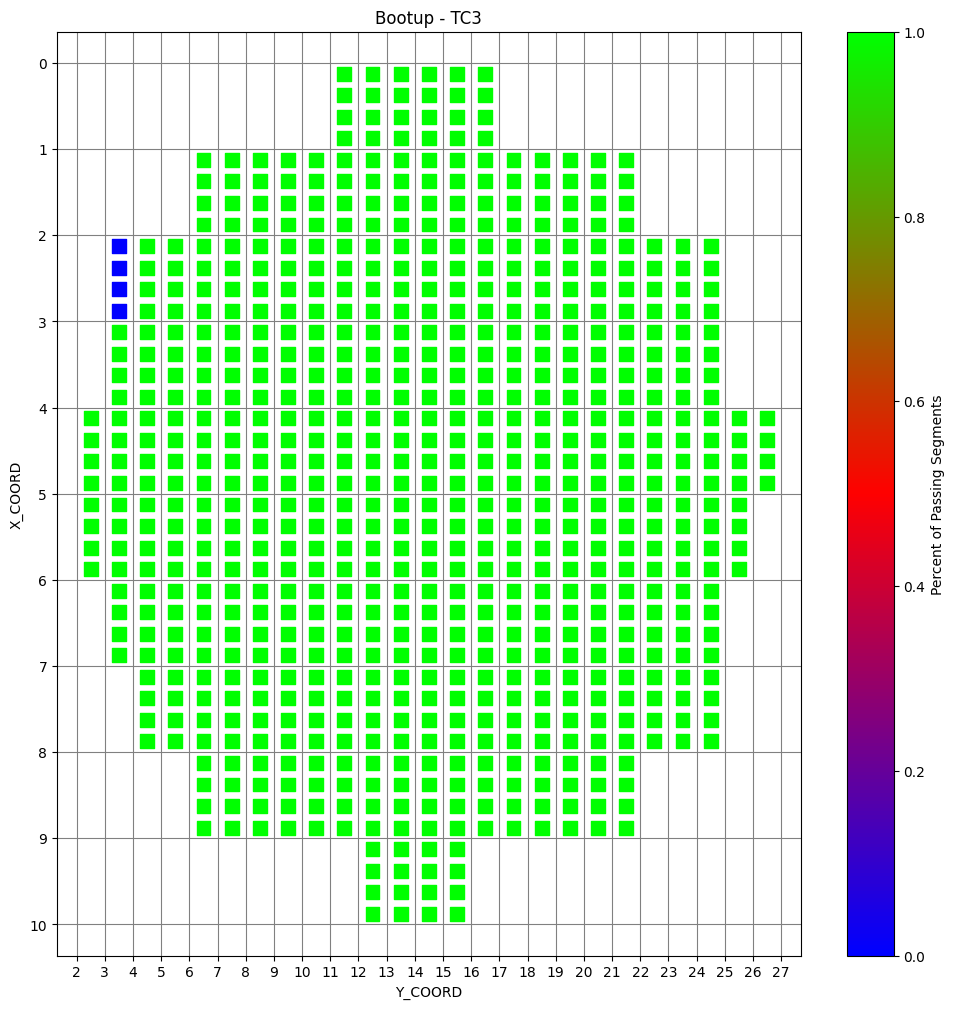

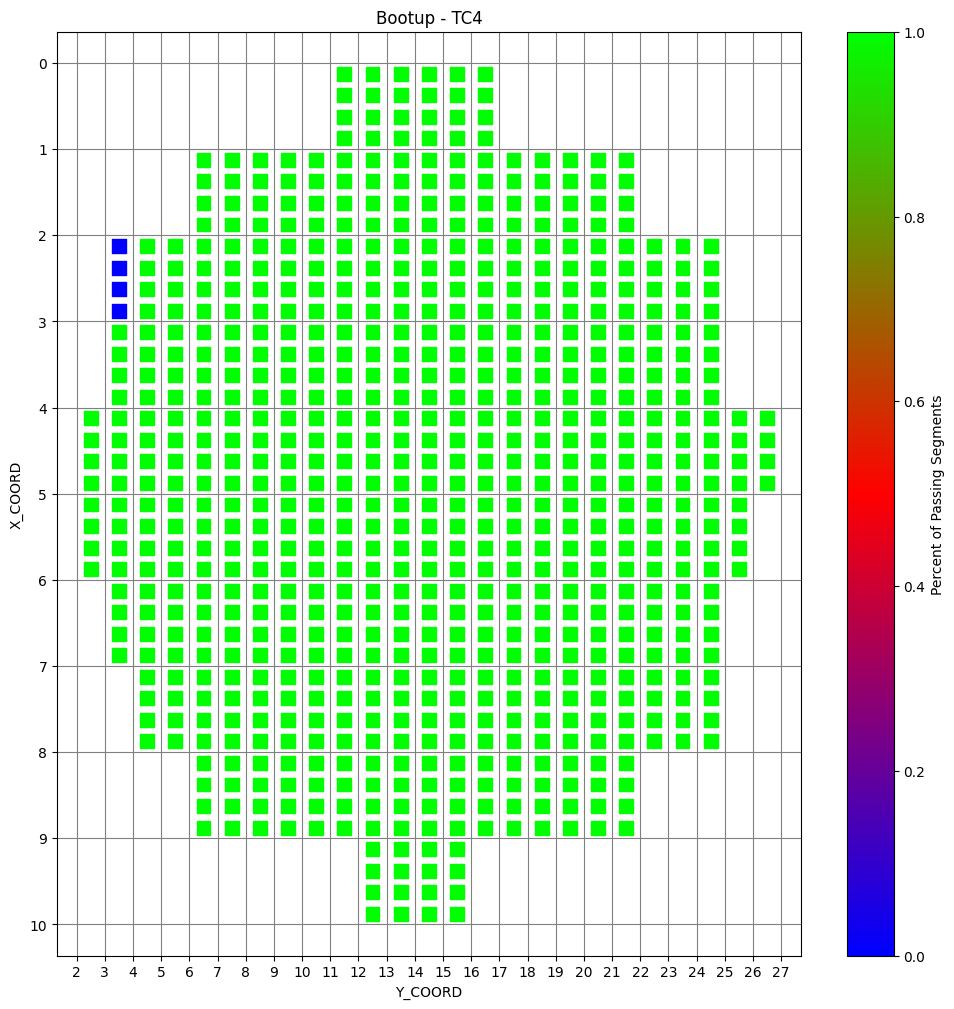

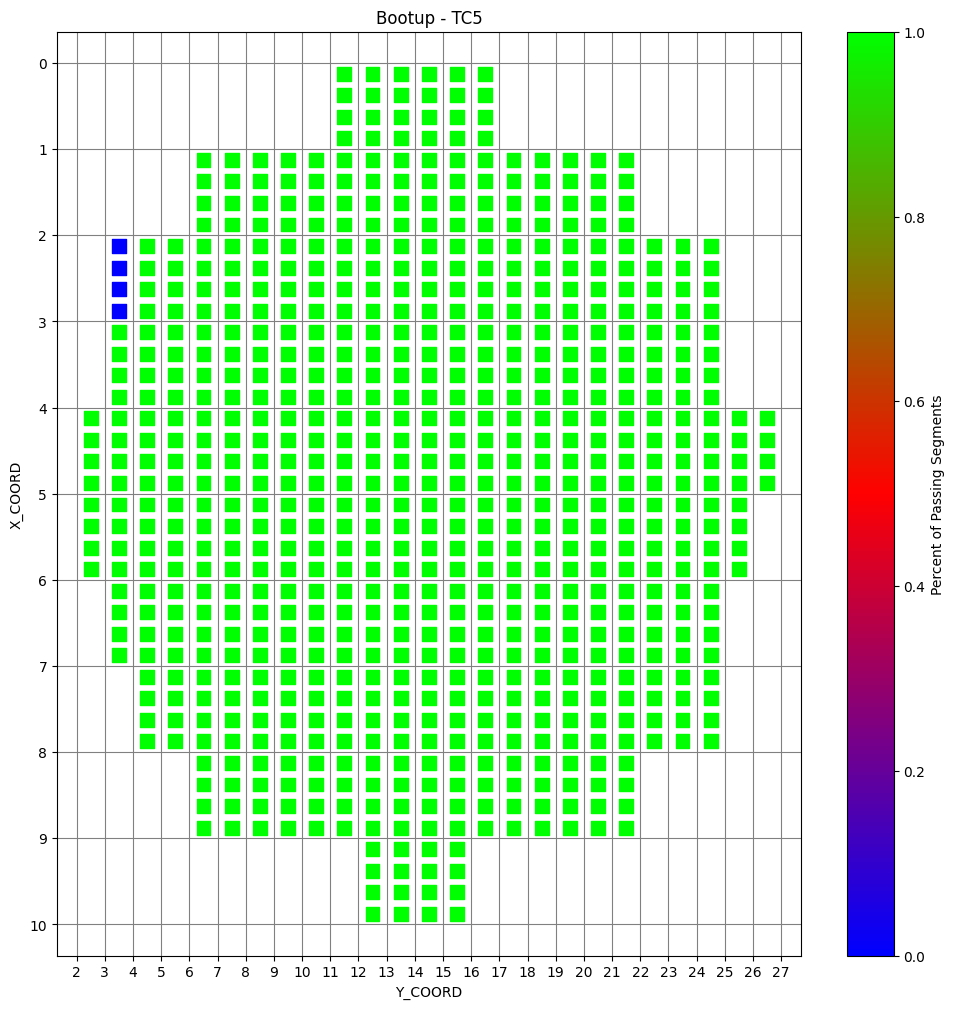

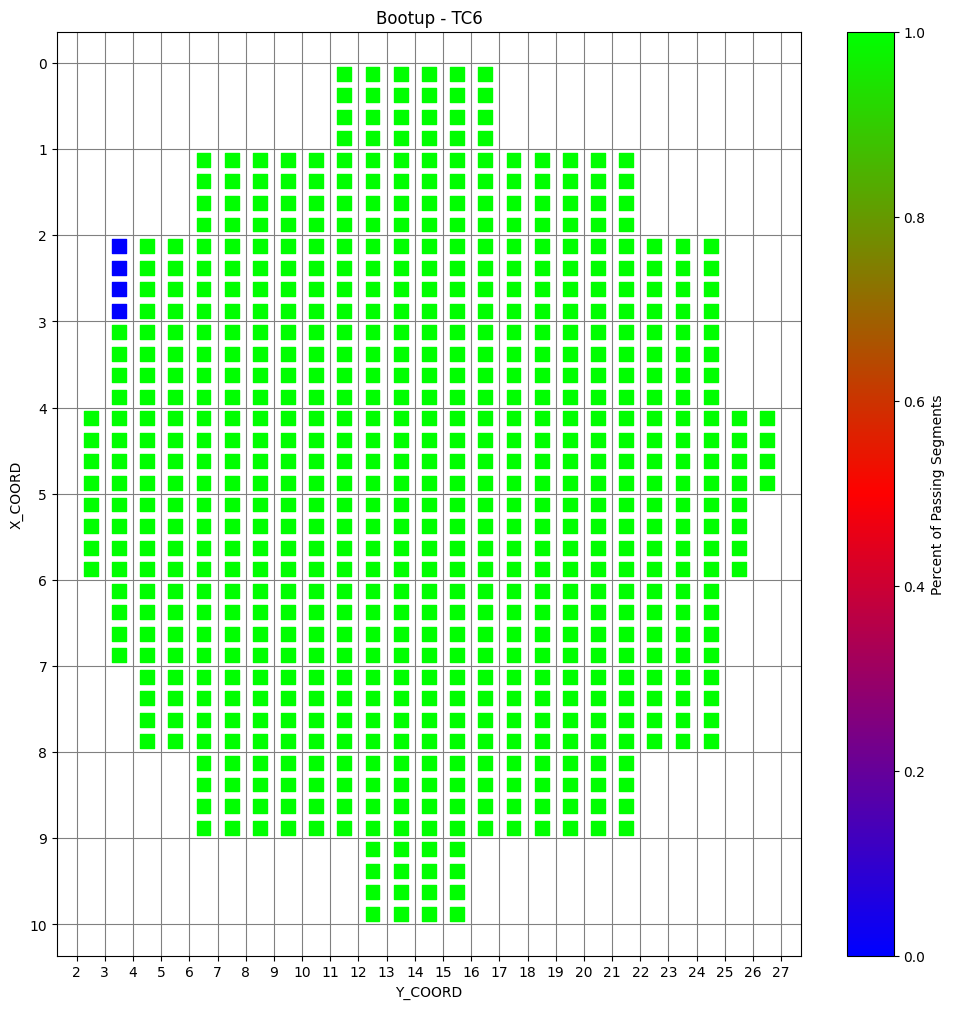

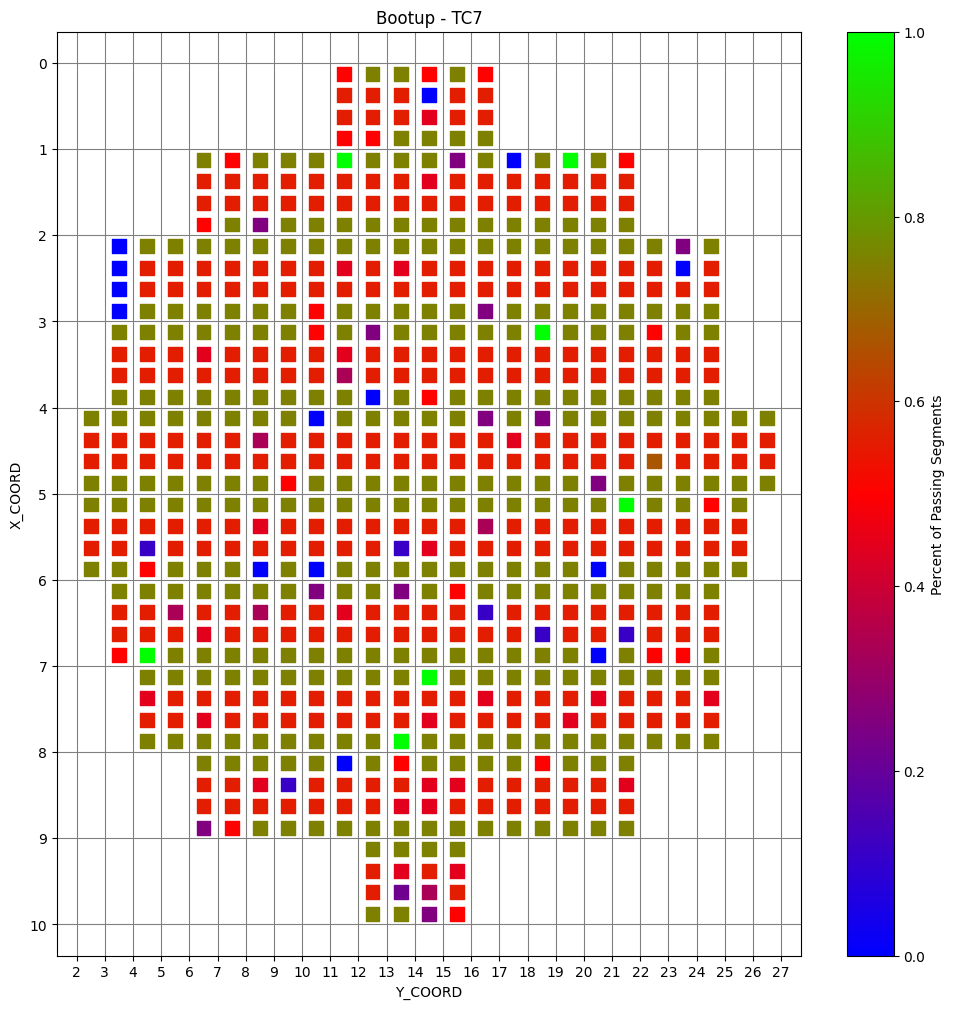

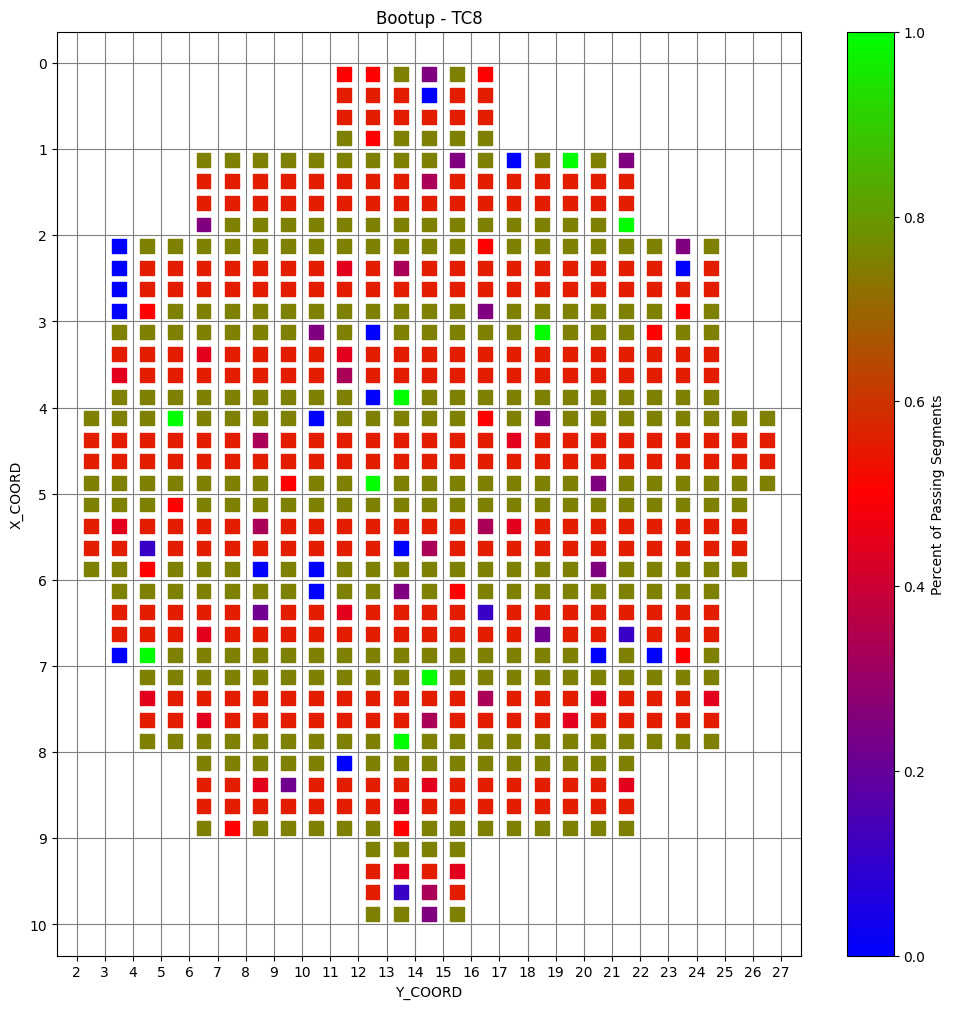

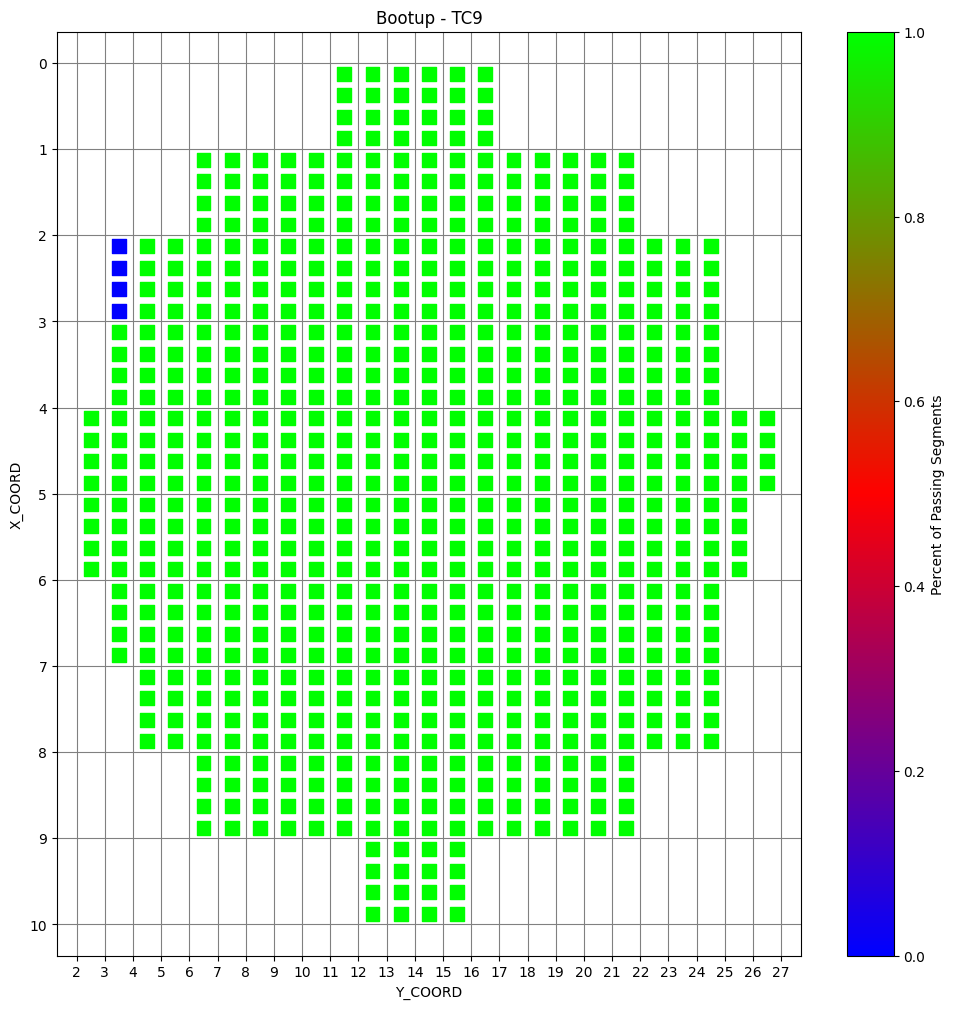

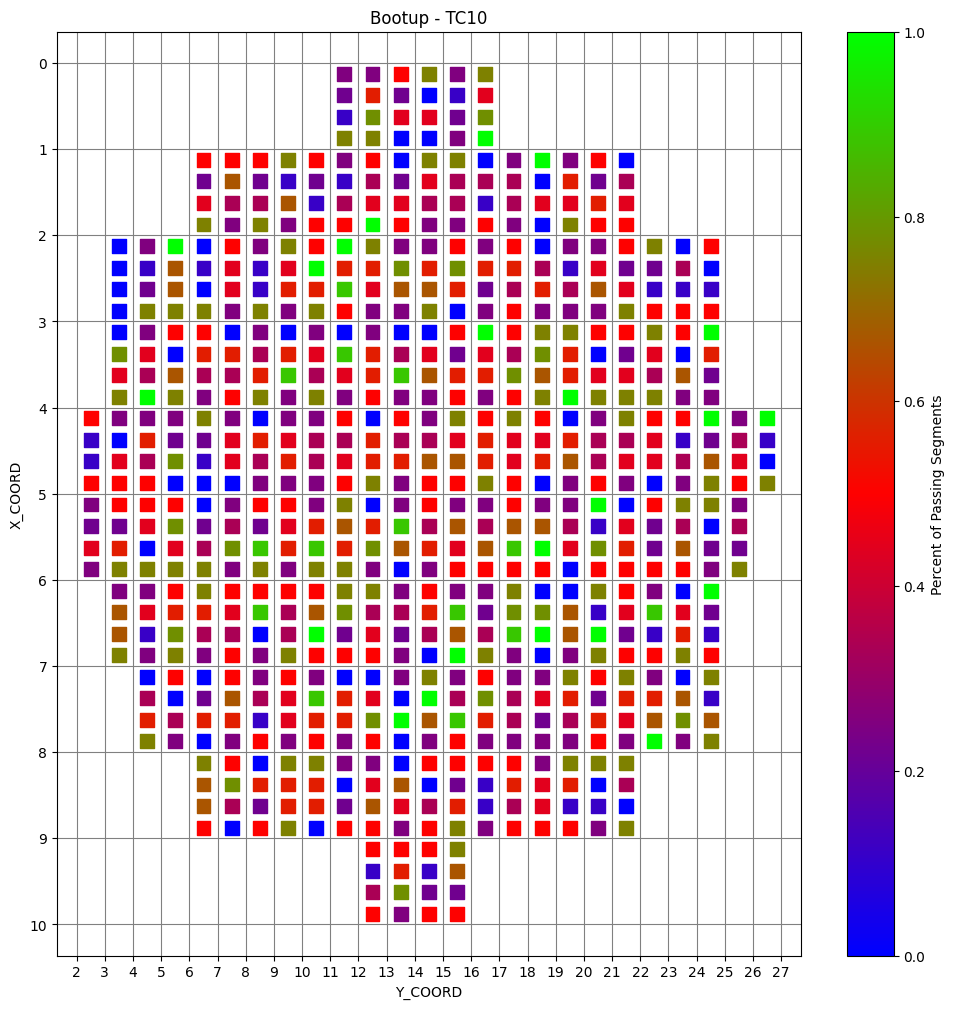

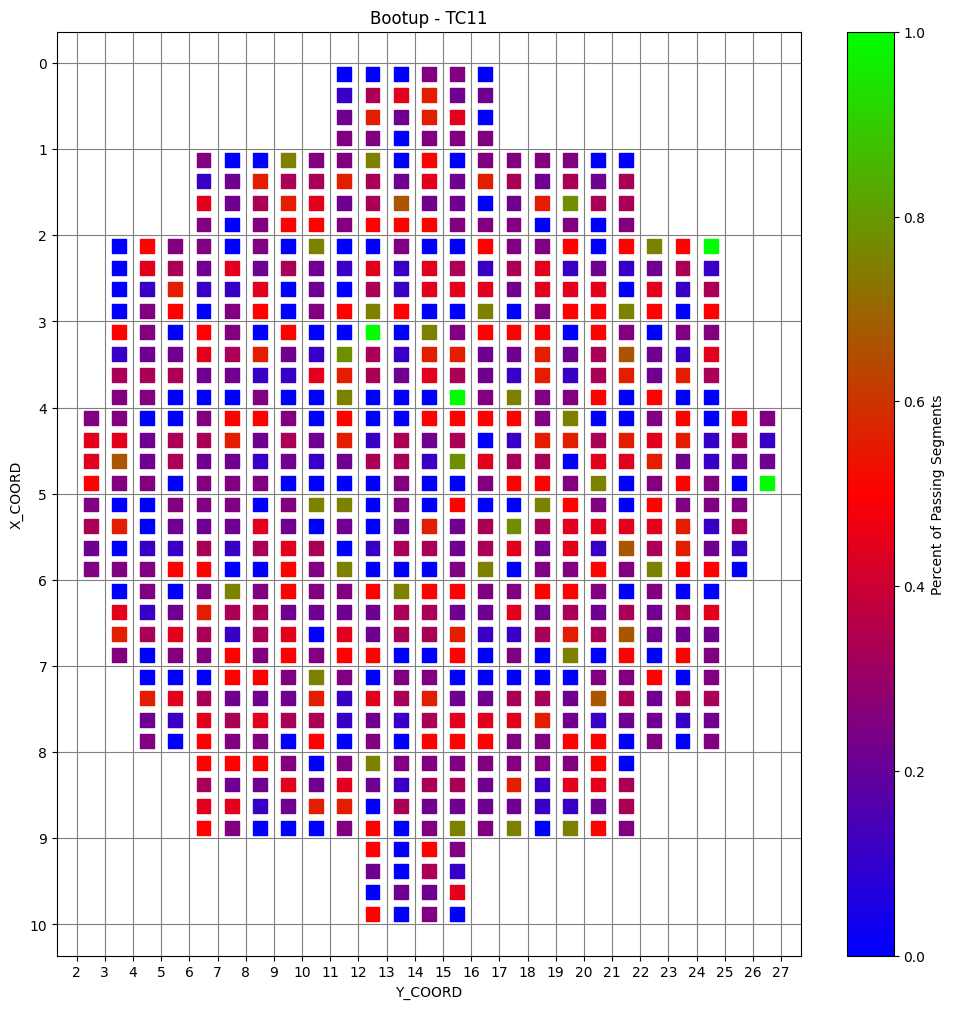

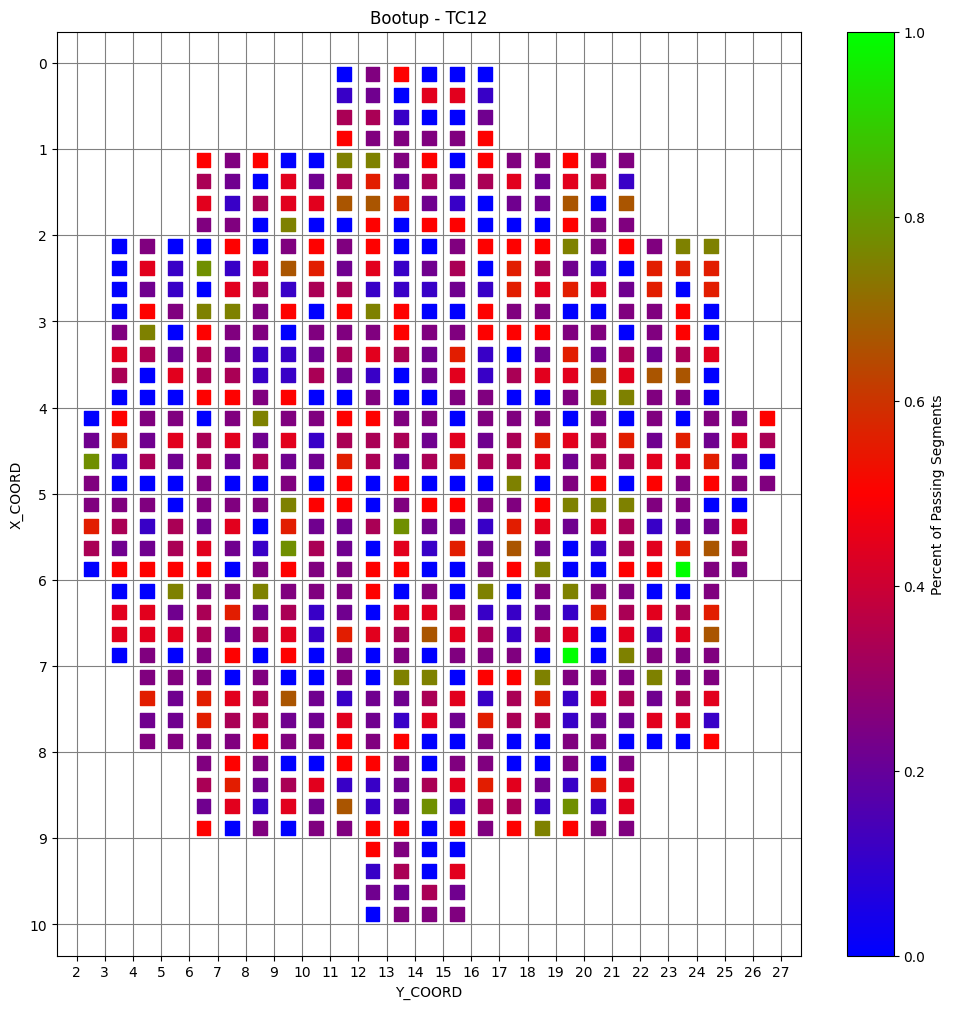

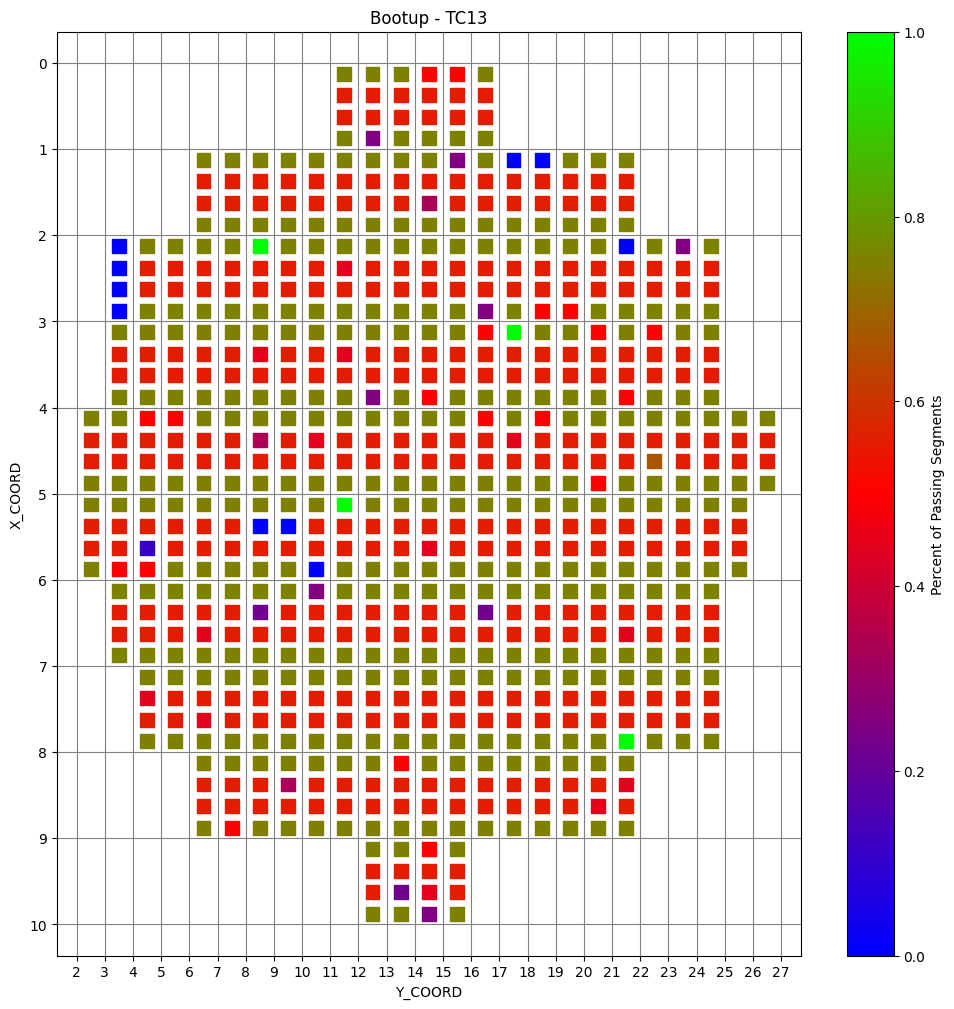

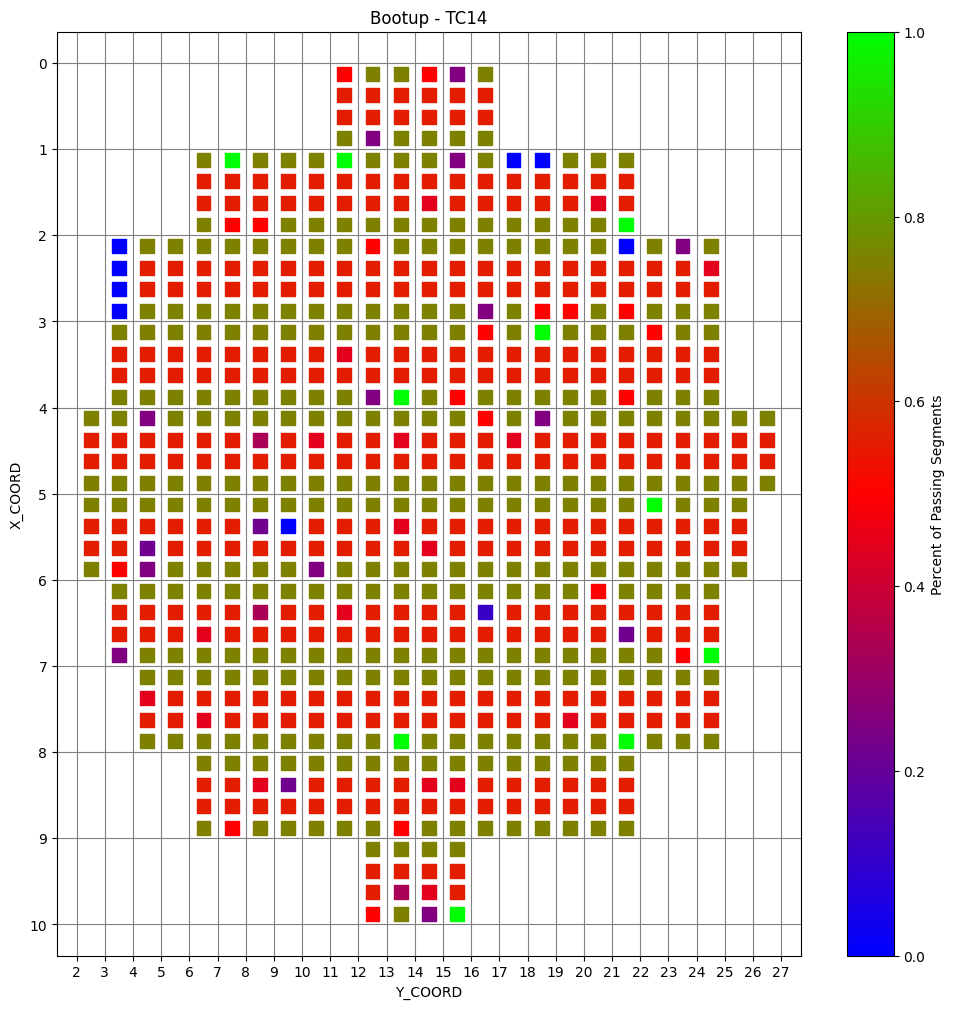

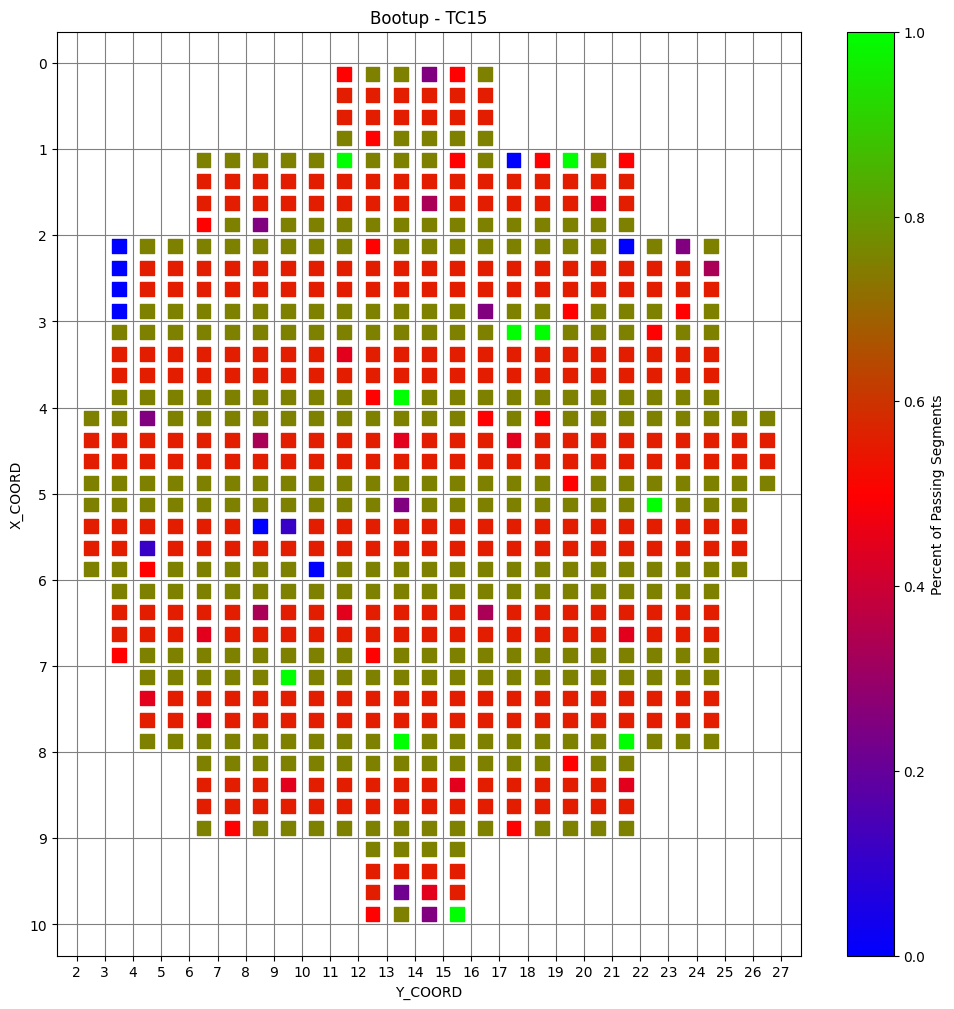

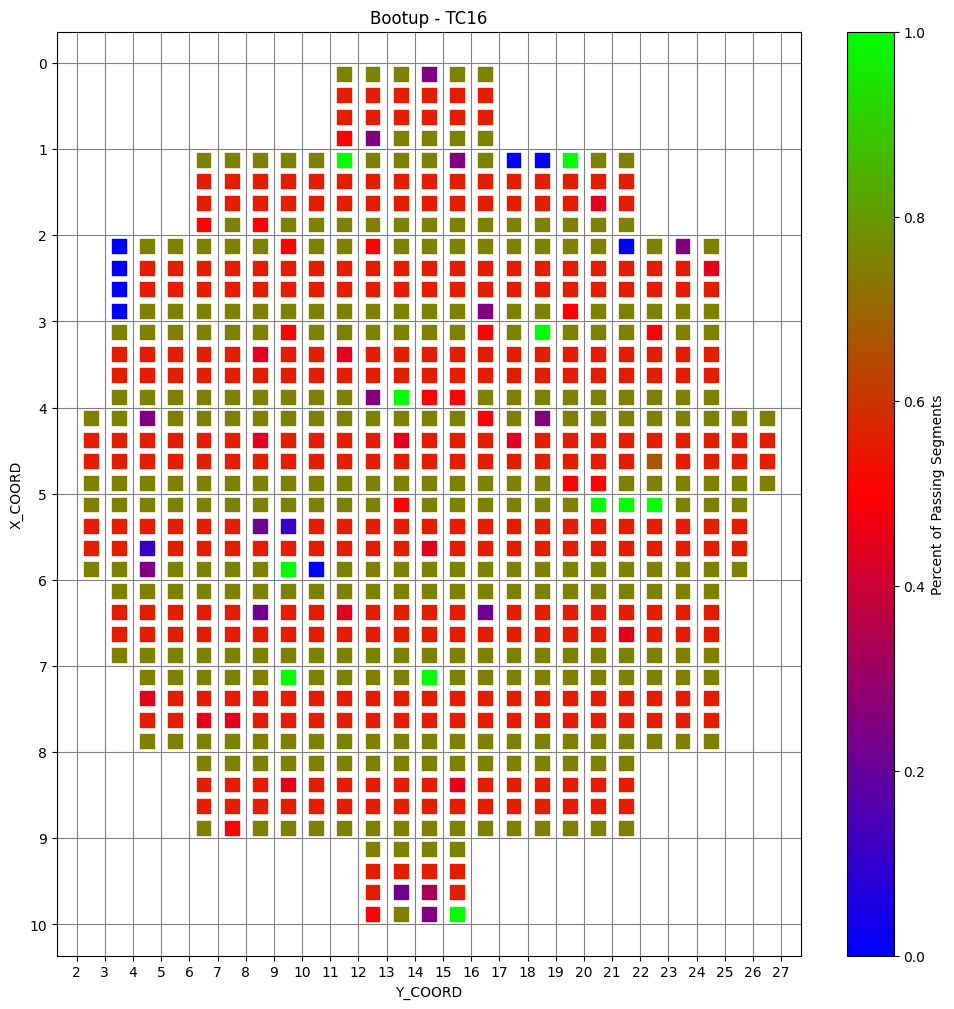

In [19]:
plot_wafer(tc_pass_bootup_pivot, testcases, 'Bootup')

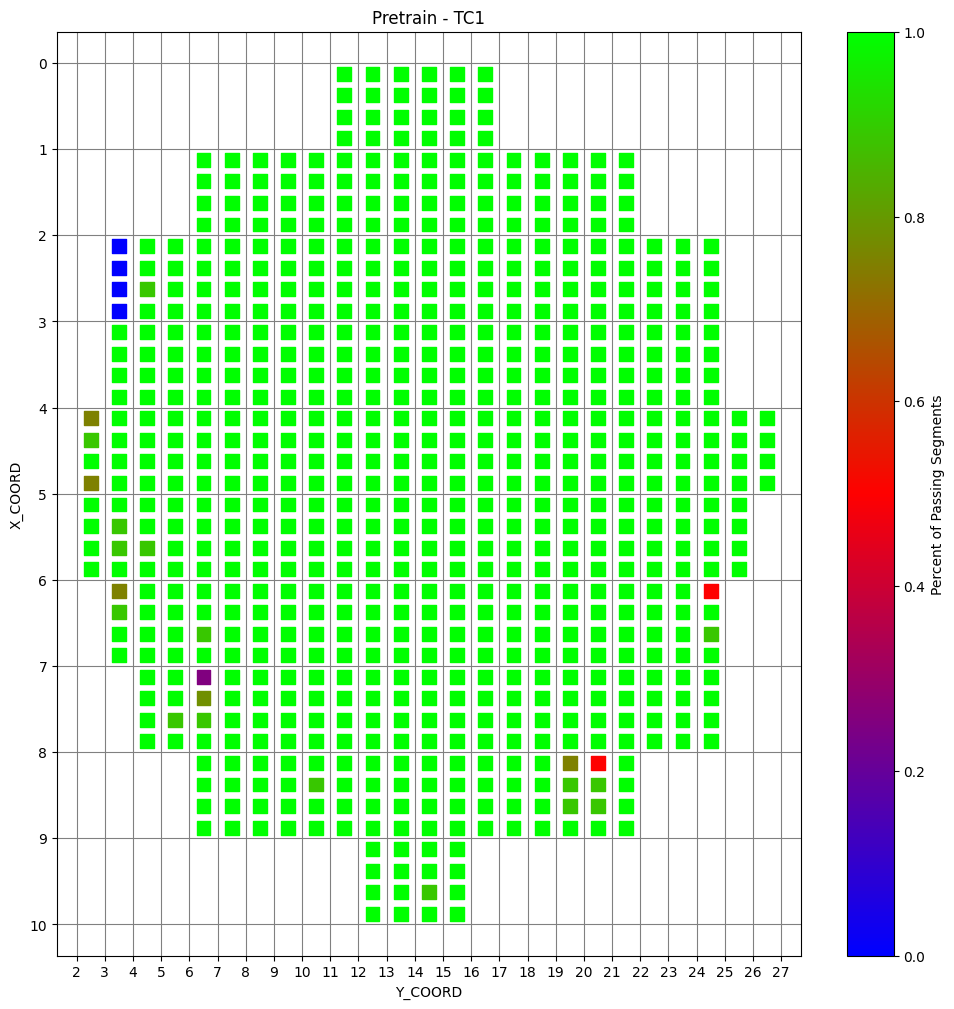

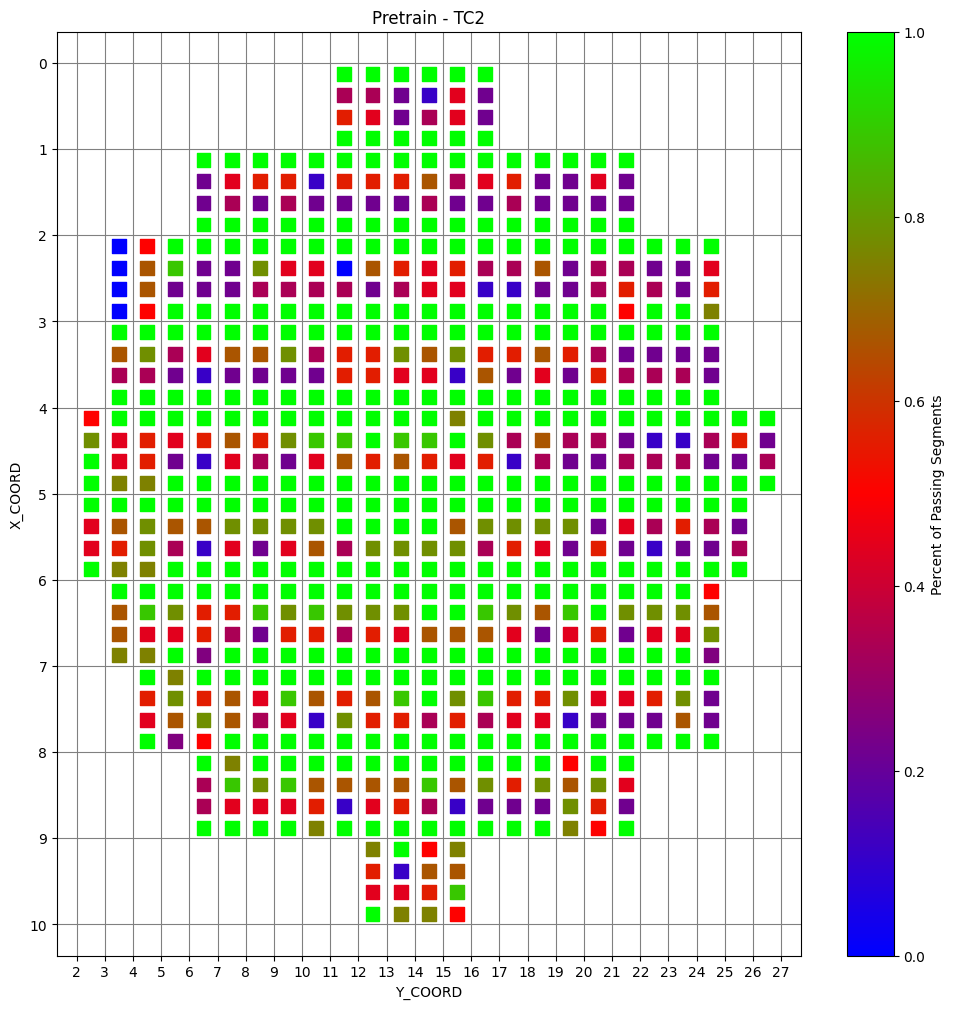

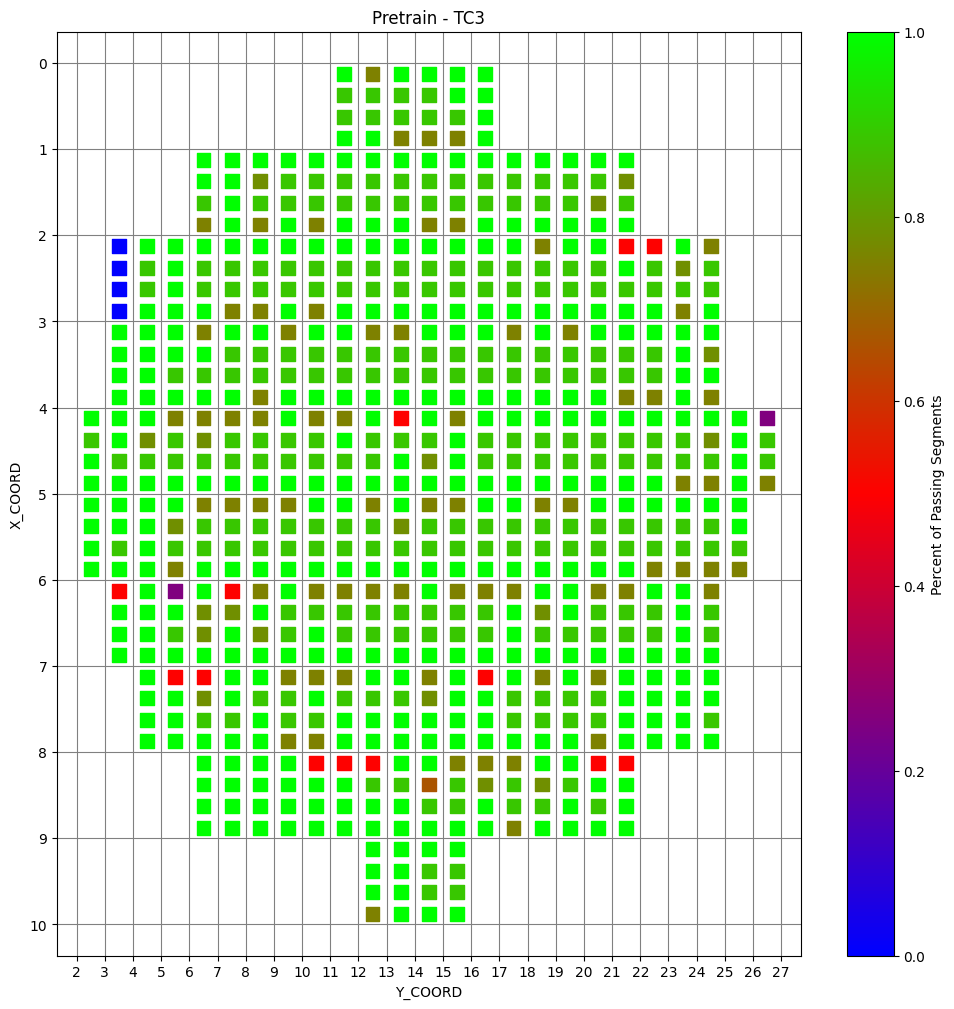

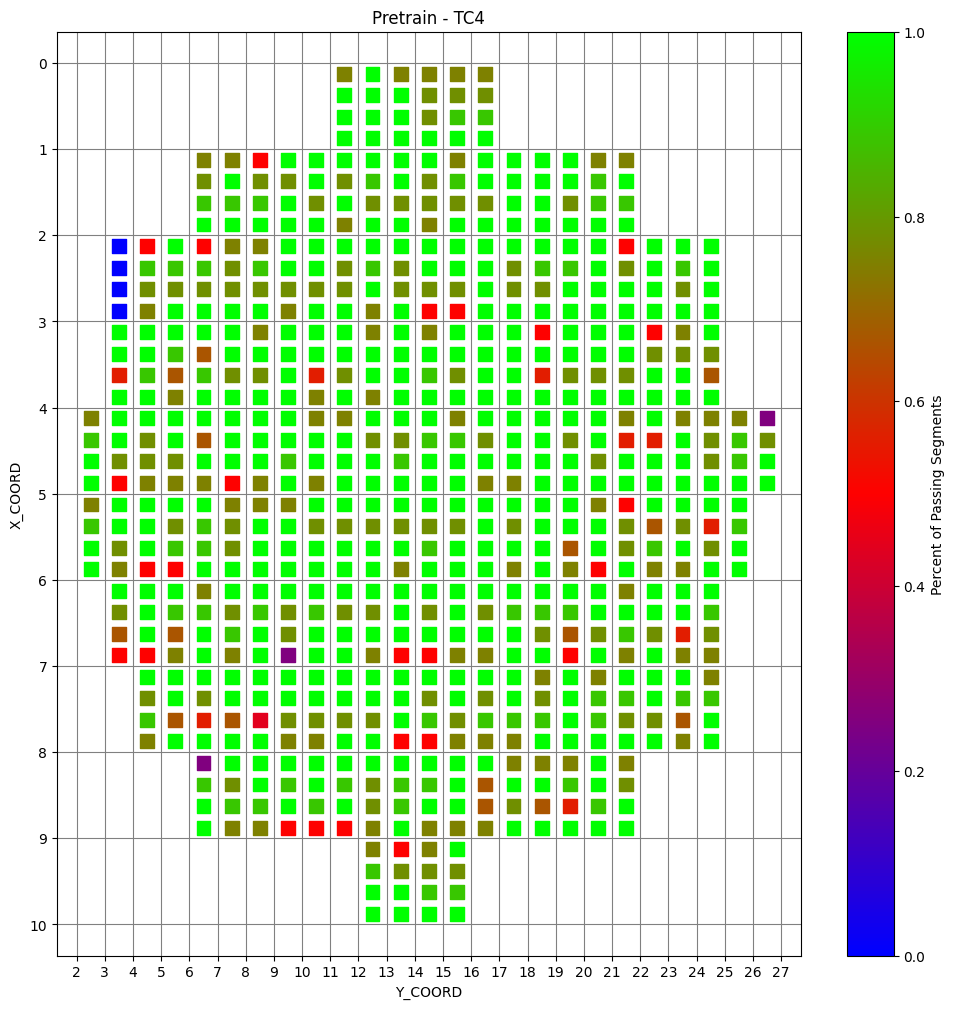

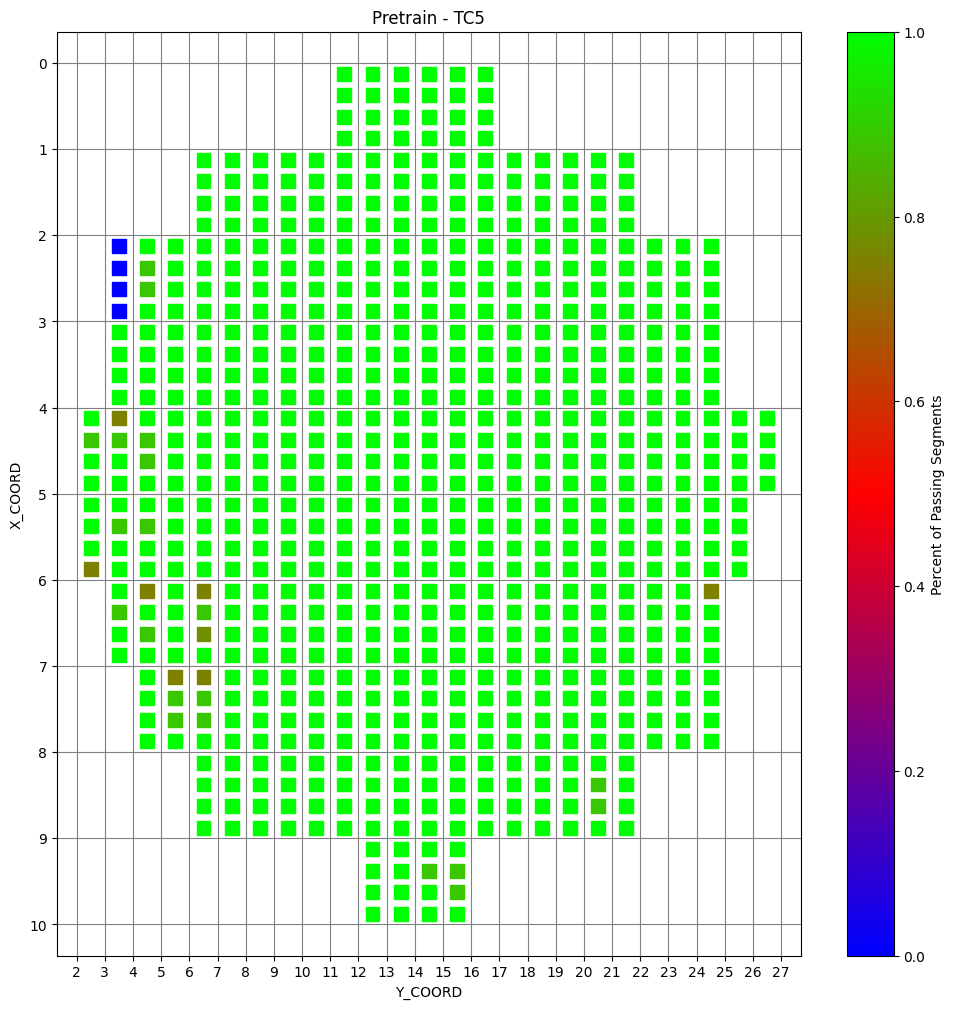

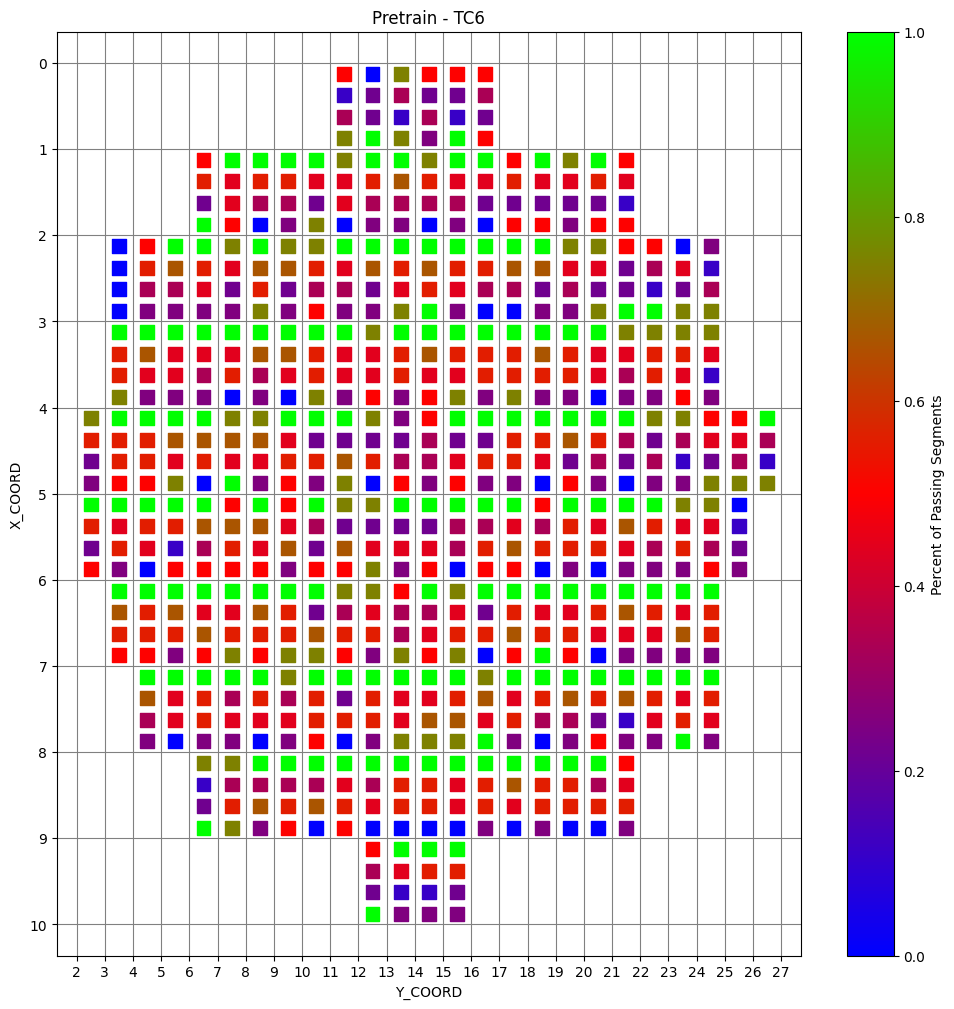

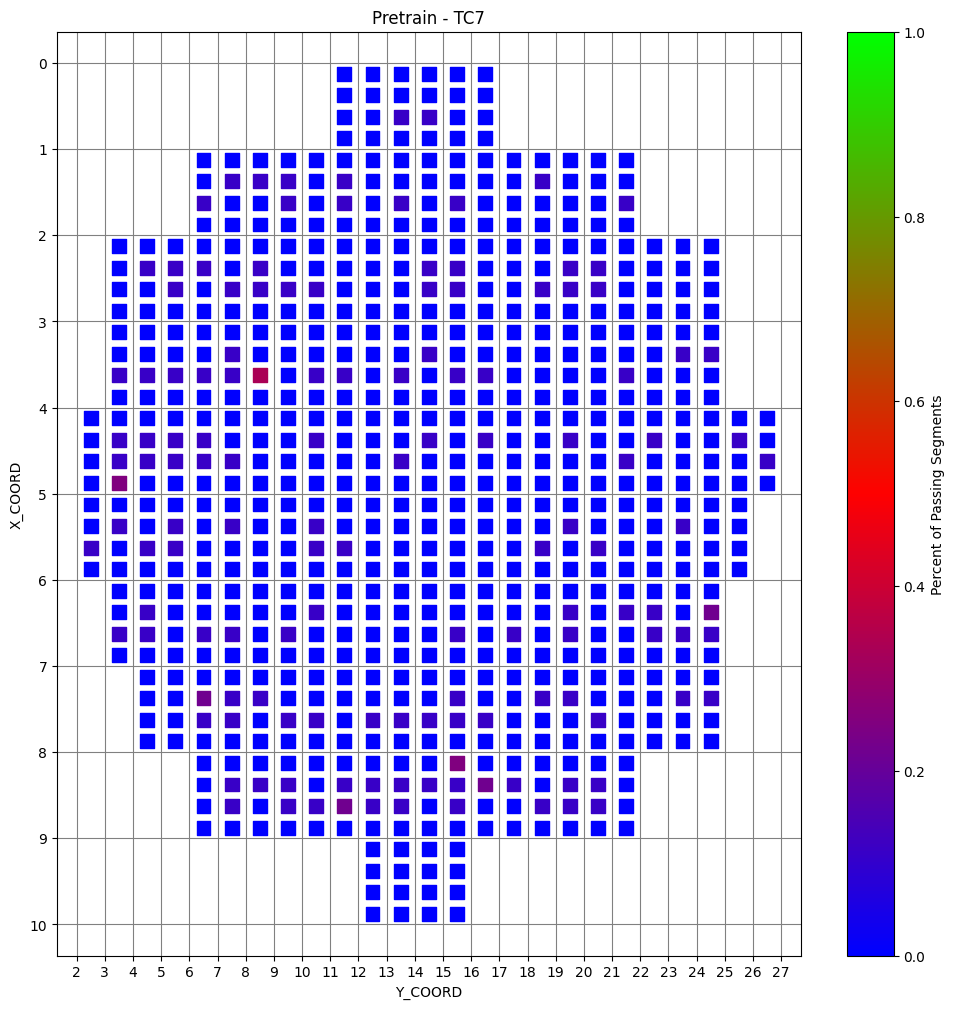

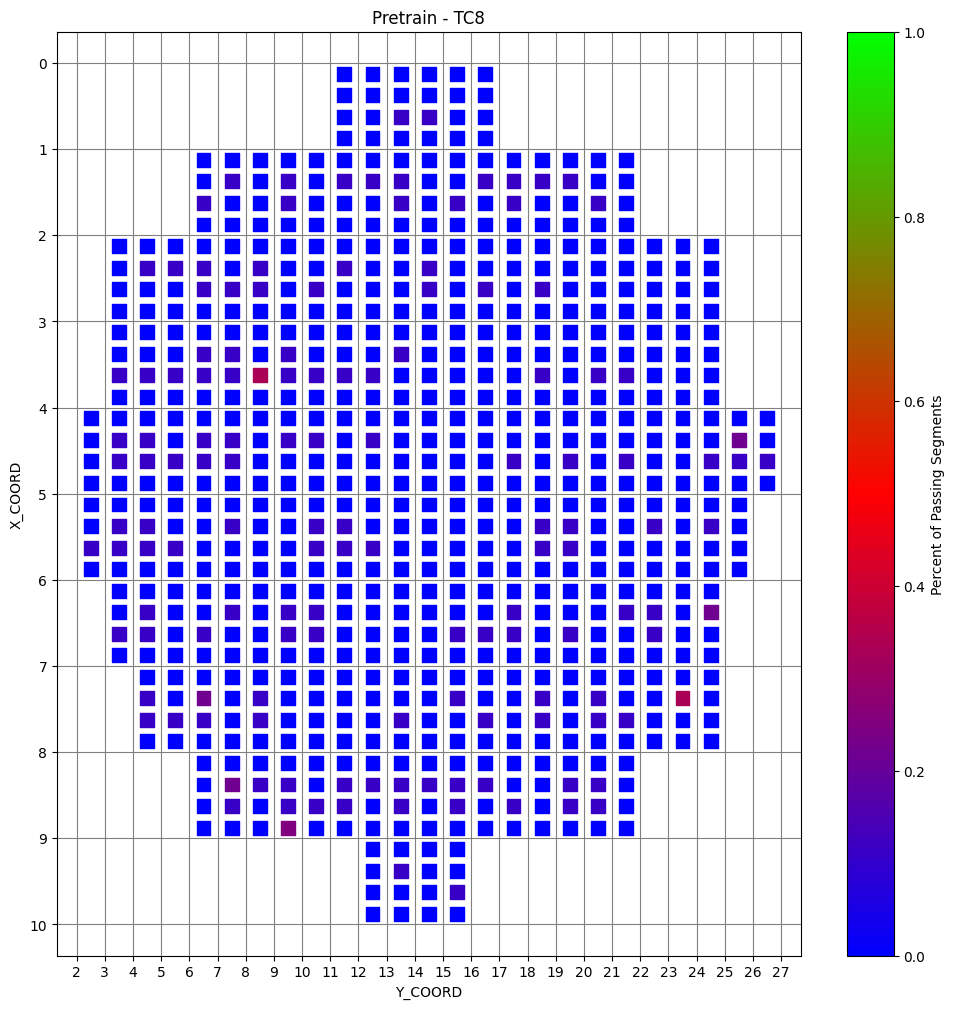

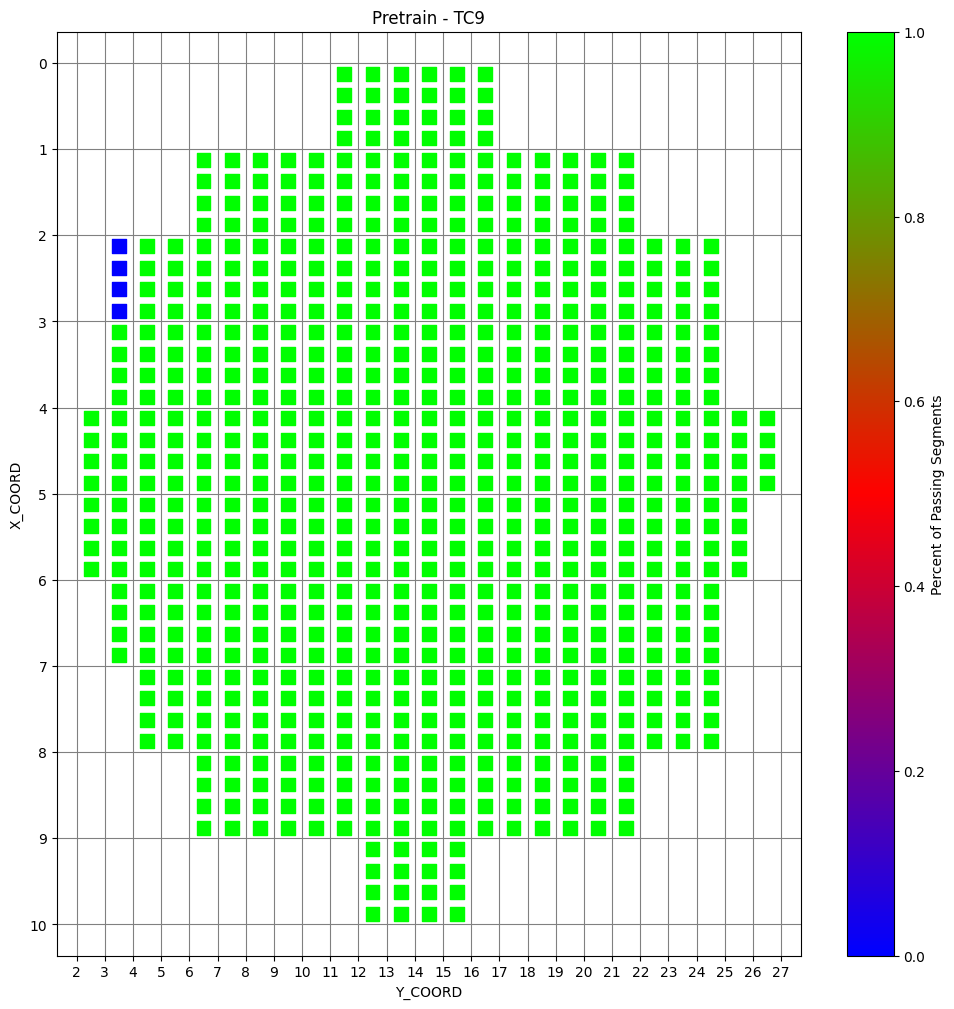

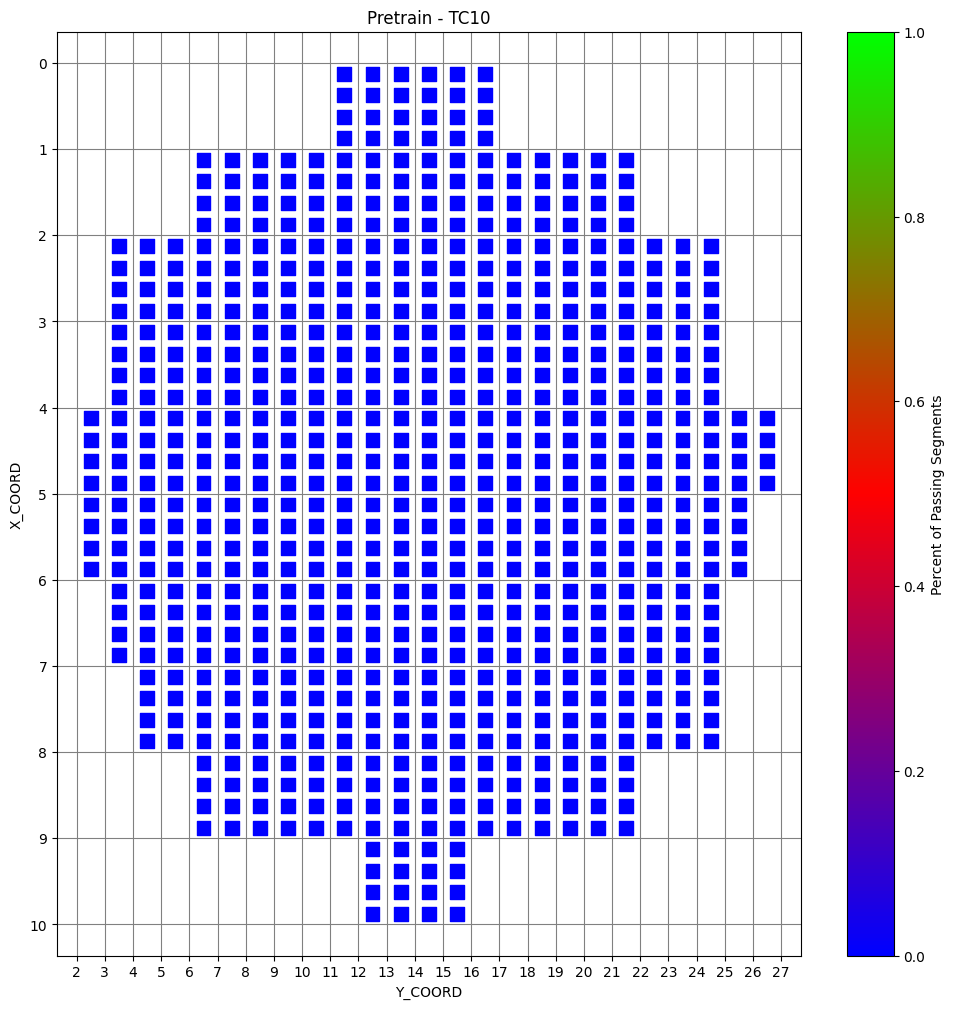

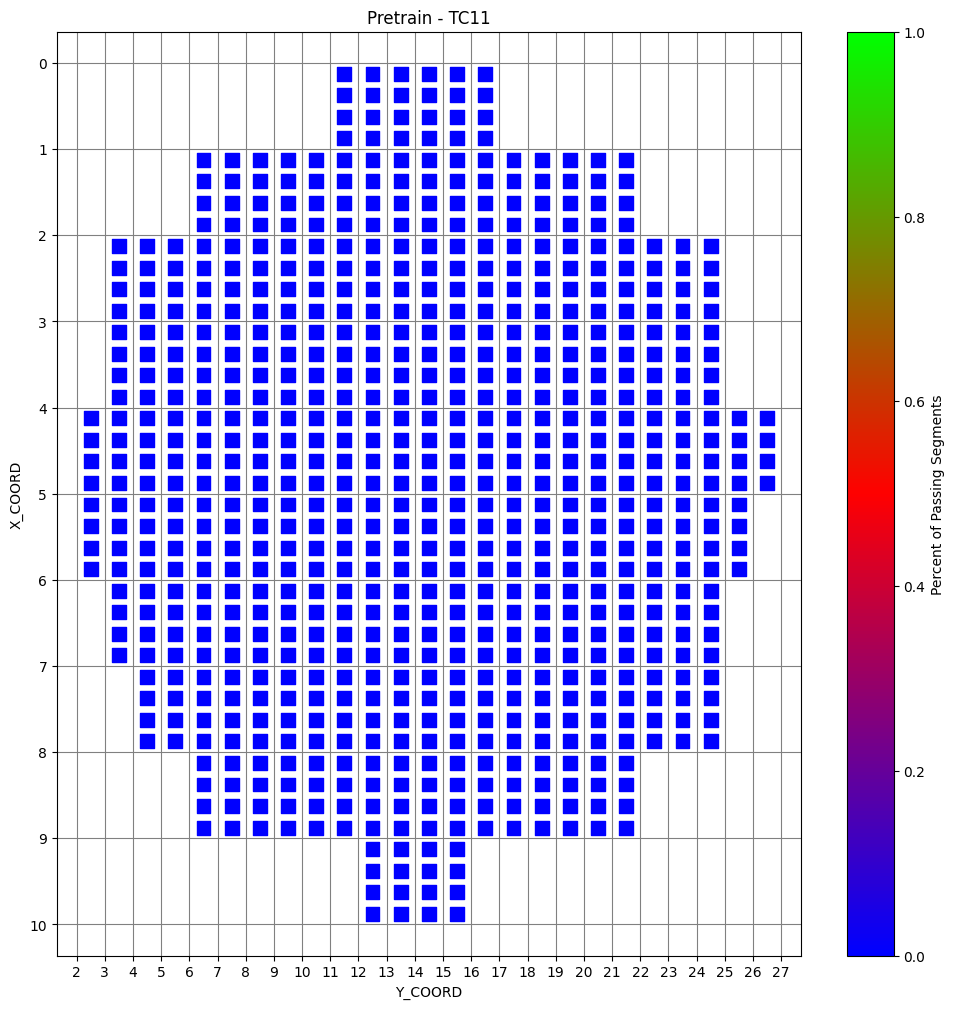

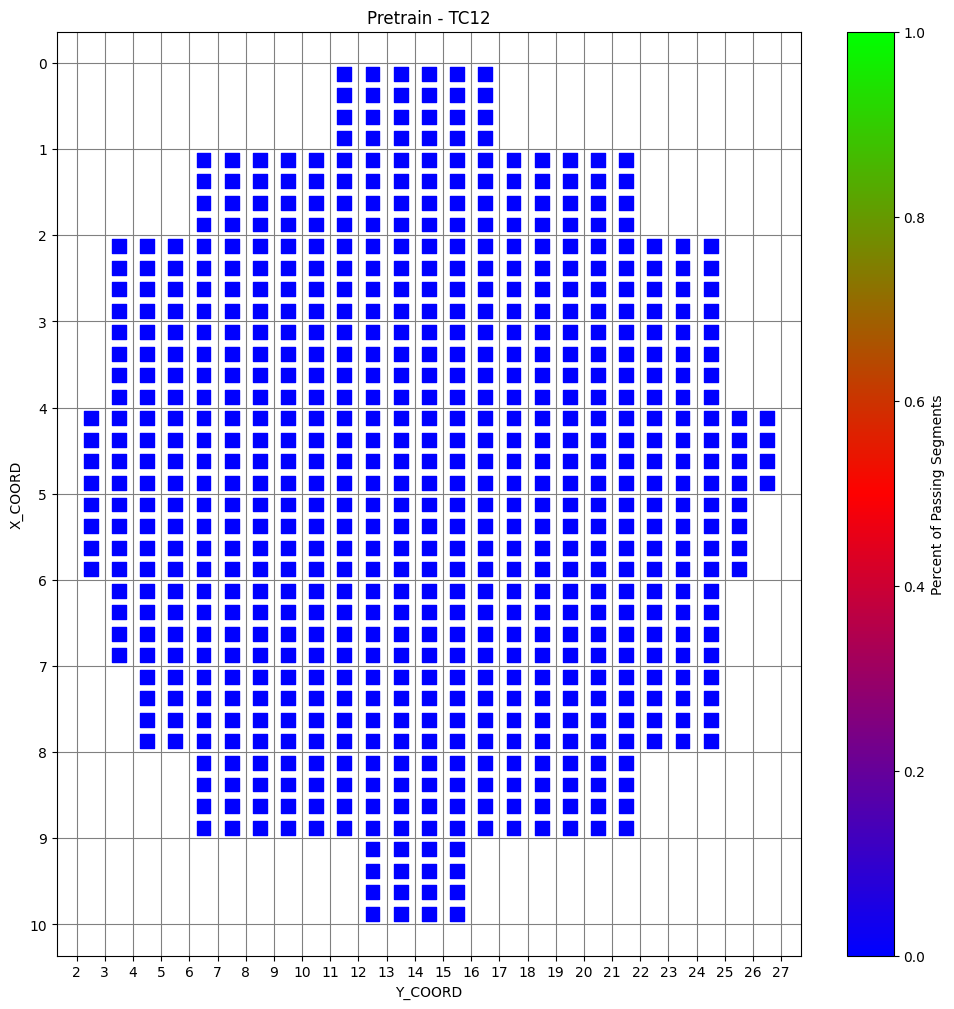

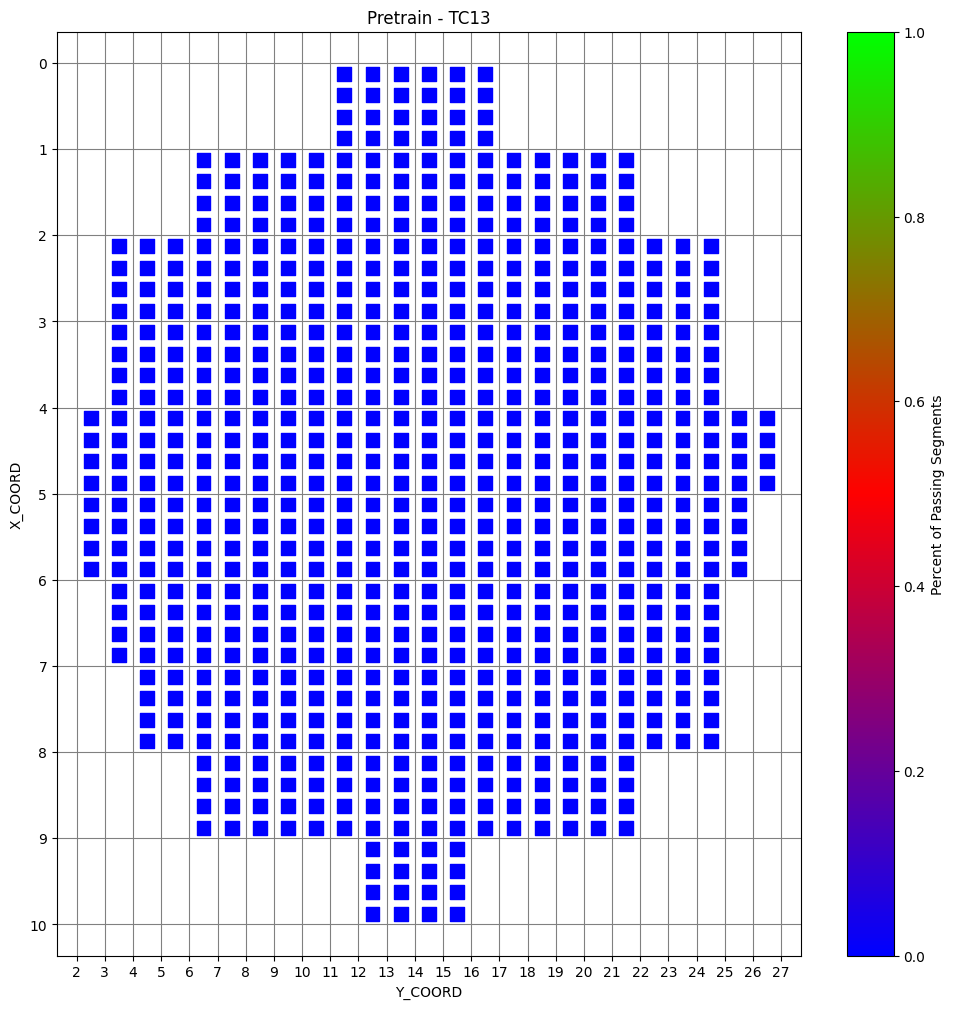

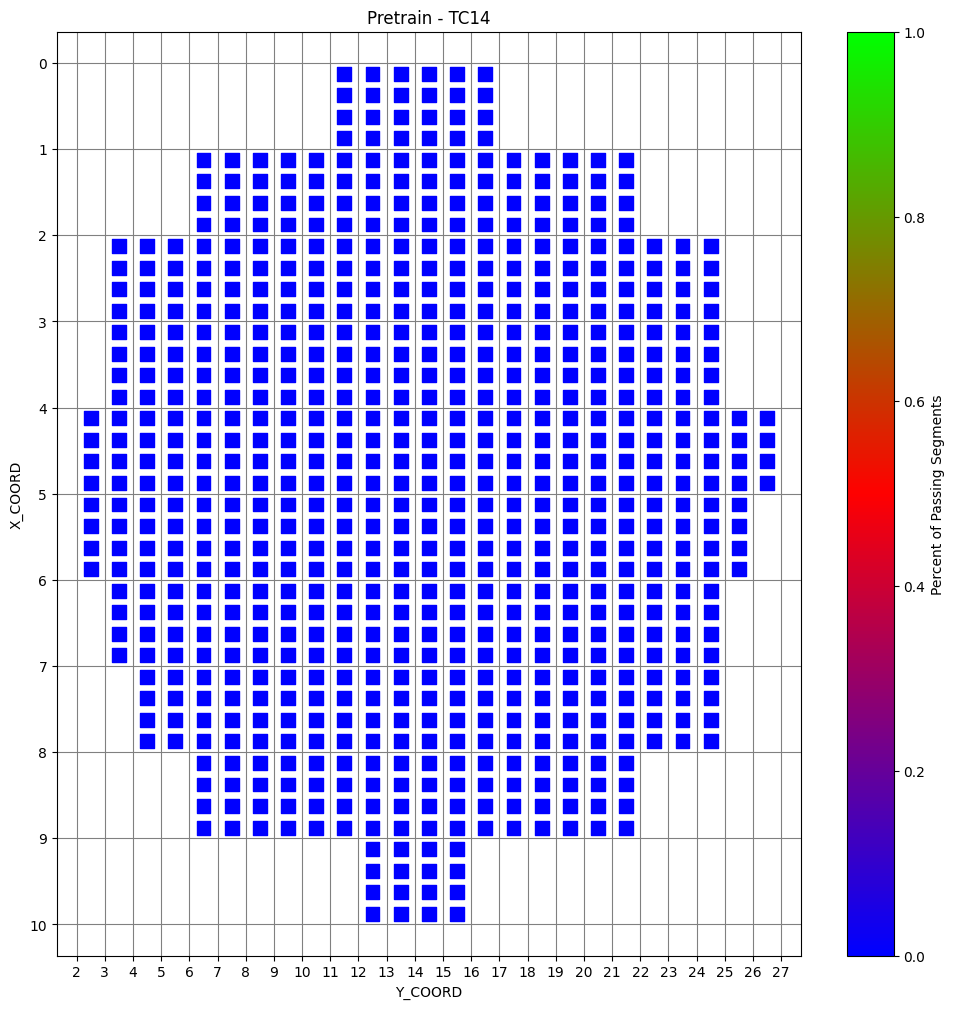

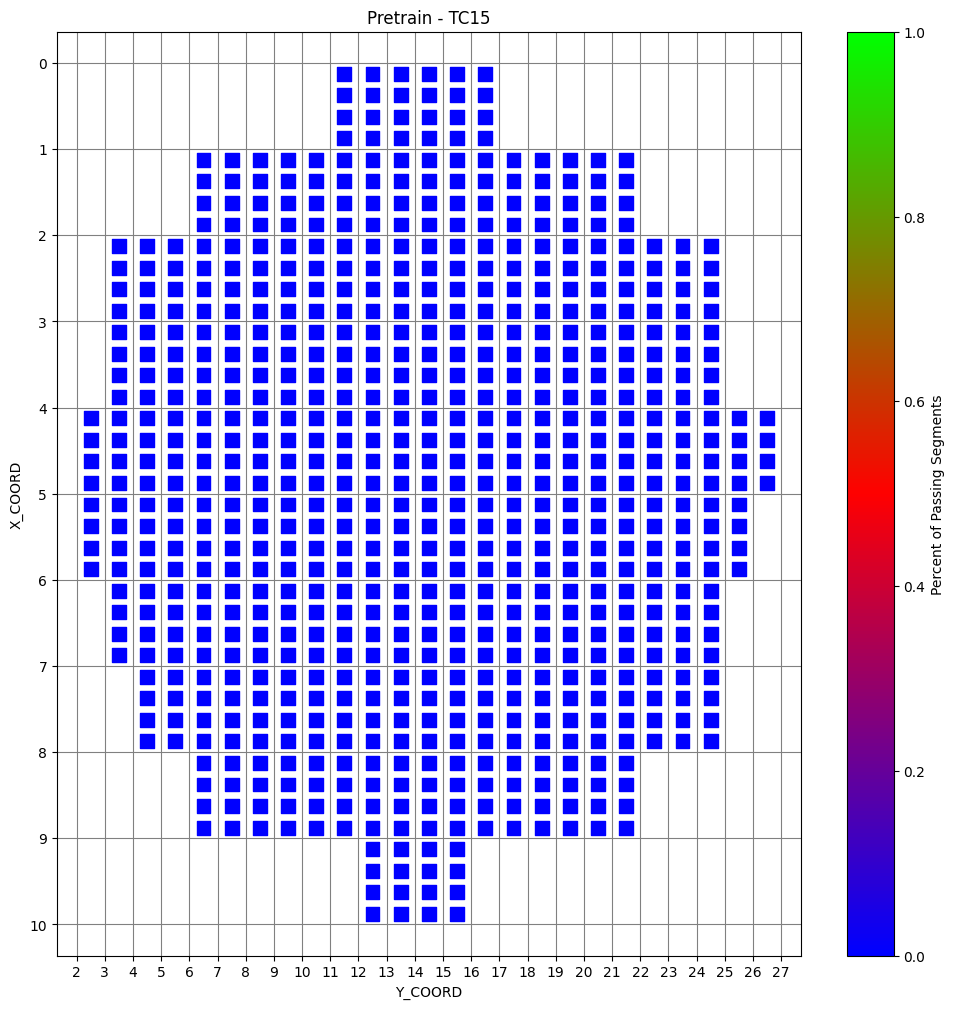

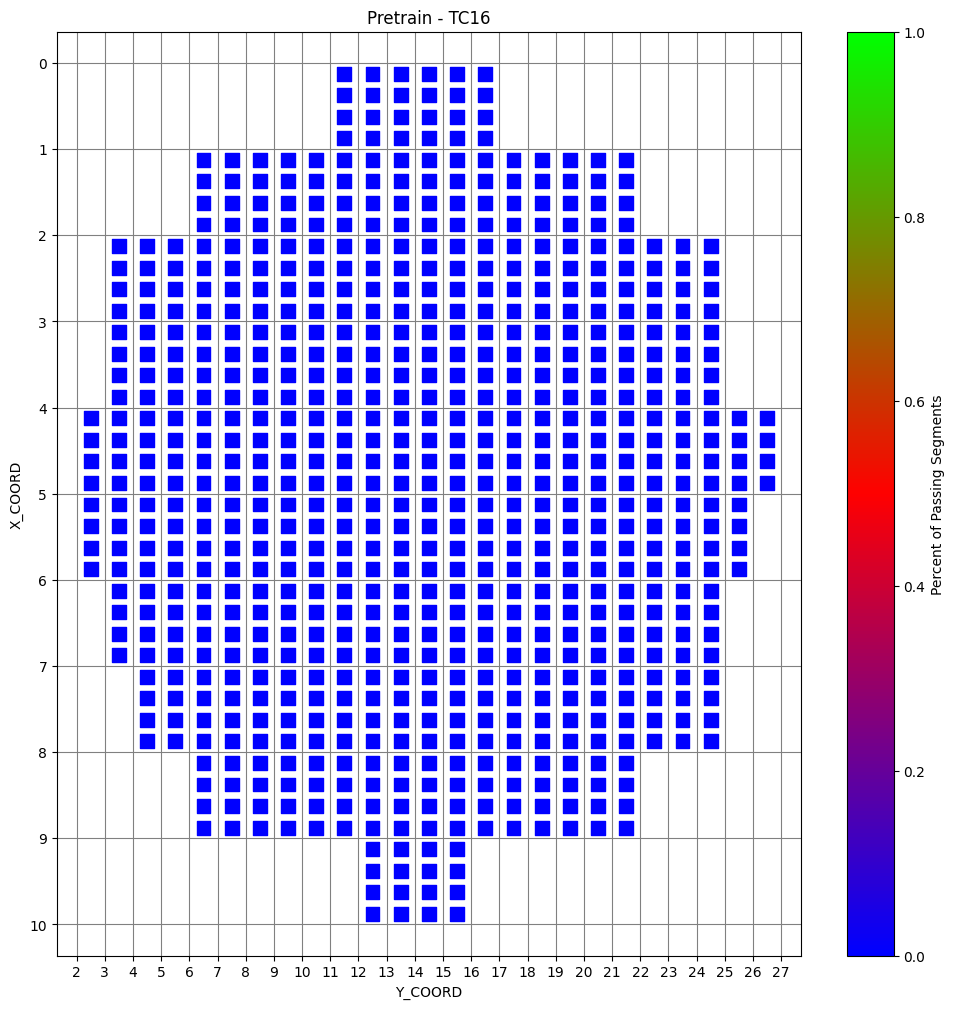

In [20]:
plot_wafer(tc_pass_pretrain_pivot, testcases, 'Pretrain')